<a href="https://colab.research.google.com/github/Ngoson2004/Deep-Learning-for-Vietnamese/blob/main/Logistic_Regression_for_Titanic_survivors_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hồi quy Logistics (Logistic Regression)

HỒi quy Logistic, hay còn gọi là Logistic Regression, là một trong những thuật toán cơ bản nhất của Học máy. Logistic Regression thường được sử dụng để phân loại một đối tượng dựa trên những đặc điểm có sẵn của đối tượng đấy. Ví dụ, một bác sĩ muốn làm xét nghiệm trên bệnh nhân bị bệnh về u bướu. Khối u đó có thể lành tính hoặc ác tính.

Logistic regression có thể được áp dụng vào việc xét nghiệm này, vì nó có thể phân loại khối u thành 2 nhóm: lành tính hoặc ác tính, dựa trên việc xử lí những dữ liệu có sẵn về khối u như kích cỡ và vị trí.

Trong notebook này, tôi sẽ sử dụng thuật toán Logistic Regression để dự đoán một hành khách có sống sót hay không trong vụ đắm tàu Titanic, dựa trên những thông tin cơ bản của người ấy, như giới tính, độ tuổi, hạng vé, chỗ ngồi , vv.

## Mục lục

## 1. Khởi động


Trước tiên, ta phải nhập về các thư viện cần thiết

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

Sau đó là nhập data. Tôi sẽ cho bạn thấy data Titanic này trông như thế nào.

In [ ]:
input = pd.read_csv('/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/titanic/train.csv')
input.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
np.shape(input)

(714, 13)

Như bạn đã thấy, thuật toán của chúng ta có thể dự đoán một người có sống sót hay không dựa vào những số liệu như tên tuổi, giới tính, chỗ ngồi, vv. Tổng cộng ta có 891 hàng và 13 cột.

Nếu bạn để ý, ta có một cột "Survival". Cột này được gọi là ground-truth label, hay còn gọi là "sự thật nền tảng". Đúng như tên gọi của nó, model sẽ lấy cột này làm nền tảng cho việc dự đoán, vì nó là kết quả cuối cùng ghi lại được của một người: cô ấy/ anh ấy có sống sót hay không.

Bây giờ chúng ta sẽ bắt đầu xử lí data

## 2. Xử lí và chiết xuất data

Để luyện một mô hình Logistic Regression, ta cần phải xác định những thông tin cần thiết để dự đoán và loại bỏ những thông tin không cần thiết.

Giả dụ ta muốn dự đoán xem một người có sống sót hay không dựa trên việc họ bao nhiêu tuổi và có bao nhiêu người đi cùng, ta sẽ làm như sau:

In [ ]:
input['Age'][5]

nan

Ồ! Hình như có điều bất thường xảy ra ở đây. Đoạn code trên nói rằng ở hàng 5, giá trị tuổi không được xác định. Đây là một lỗi cực kì chí mạng do người làm dataset này gây nên.

Nếu cứ giữ nguyên cột này để dùng làm đầu vào cho model, toàn bộ quá trình luyện model của chúng ta sẽ bị hỏng. Vì chỉ cần một giá trị không được xác định, mọi phép toán khác sẽ thành không xác định. Ta cần xử lí ngay!

In [ ]:
input['Number of accompany'] = input['SibSp'] + input["Parch"]
input = input.dropna(subset=['Age','Number of accompany'])
X_data = input[['Number of accompany', 'Age']]
y_data = input['Survived']

In [ ]:
X_data, y_data = X_data.to_numpy(), y_data.to_numpy()

Như bạn đã thấy, tôi đã tạo ra một cột mới, và cũng là thông tin mới cho đầu vào: Tổng số người đi cùng. Thay vì phải chia ra thành số vợ số chồng, hay số ông bà bố mẹ con cái đi cùng, ta chỉ cần biết có bao nhiêu người đi cùng một cá thể.

Ta dùng hàm .dropna() của pandas để bỏ hết tất cả các hàng có giá trị không xác định. Ngoài ra, data được chuyển thành các mảng numpy array, vì trong notebook này chúng ta dùng thư viện Numpy để thực hiện các thuật toán. Mặt khác, numpy array cũng dễ xử lí hơn so với pandas.

Cuối cùng, tôi ghép 2 cột lại thành một dataset mới. Kết quả là ta có một tập đầu vào X, gồm 714 hàng và 2 cột.

In [ ]:
np.shape(X_data)

(714, 2)

In [ ]:
X_data

array([[ 1., 22.],
       [ 1., 38.],
       [ 0., 26.],
       ...,
       [ 0., 19.],
       [ 0., 26.],
       [ 0., 32.]])

Ngoài ra, ta có cột Survival là đầu vào thứ 2, gọi là Y. Cột này quan trọng vì nó cho ta biết hành khách có sống sót hay không. Cột này chính là "sự thật nền tảng" mà tôi đã nhắc tới.

In [ ]:
y_data

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [ ]:
np.shape(y_data)

(714,)

Khi làm việc với dữ liệu bảng, việc để một chiều bị khuyết như trên có thể tạo lỗi khi luyện model về sau. Vậy nên ta cần chỉnh cho cột Y này có thêm một chiều nữa.

In [ ]:
y_data = y_data.reshape((714,1))

In [ ]:
y_data.shape

(714, 1)

In [ ]:
y_data

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

Ngoài ra, ta phải tách tập X và tập Y, mỗi cái thành 2 tập mới, một tập dùng cho training (luyện mô hình), một tập dùng cho validation (đánh gía hiệu quả của mô hình).

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2)
print("Kích thước tập X dùng cho training: ",np.shape(X_train))
print("Kích thước tập Y dùng cho training: ",np.shape(y_train))
print("Kích thước tập X dùng cho validation: ",np.shape(X_val))
print("Kích thước tập Y dùng để cho validation: ",np.shape(y_val))

Kích thước tập X dùng cho training:  (571, 2)
Kích thước tập Y dùng cho training:  (571, 1)
Kích thước tập X dùng cho validation:  (143, 2)
Kích thước tập Y dùng để cho validation:  (143, 1)


## 3. Minh hoạ dữ liệu

Ở bước này, chúng ta sẽ biểu diễn dữ liệu mà chúng ta sắp sử dụng bằng đồ thị. Tuy không có ảnh hưởng gì đến quá trình luyện model, việc minh hoạ giúp chúng ta nhìn ra một số đặc điểm thú vị về dữ liệu (hidden pattern).

Dưới đây là một đồ thị biểu diễn sự tương quan giữa các cột trong dữ liệu (multi-collinearity).

<Axes: >

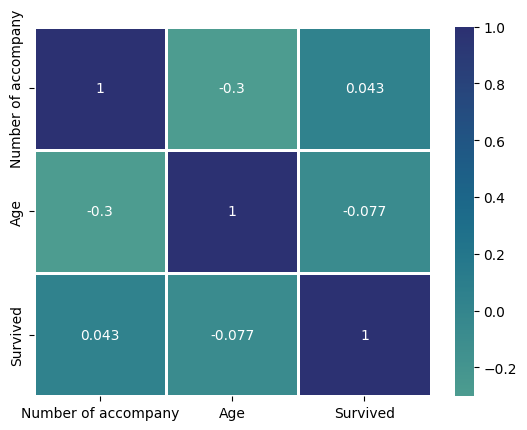

In [ ]:
import seaborn as sns

visualise_data = input[['Number of accompany', 'Age', 'Survived']]
sns.heatmap(visualise_data.corr(), center=0, linewidths=0.8, cmap="crest", annot=True)

Khi nhìn vào multi-collinearity giữa các cột, ta sẽ thấy được mối quan hệ giữa các đại lượng, rằng chúng ảnh hưởng lên nhau như thế nào. Ví dụ, collinearity giữa Tuổi và Số người đi cùng có giá trị âm, chứng tỏ tuổi hành khách càng ít thì số người đi cùng càng cao.

Tiếp theo, ta sẽ vẽ một đồ thị 3D để biểu diễn tập data mà ta chuẩn bị dùng cho luyện model.

In [ ]:
from ipywidgets import interactive

from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d

def plot_3d(angle=230):
  fig = plt.figure()

  # syntax for 3-D projection
  ax = fig.add_subplot(111, projection='3d')

  # defining all 3 axis
  z = y_data
  x = input['Age']
  y = input['Number of accompany']

  # plotting
  ax.scatter(x, y, z, c="b", alpha=0.5)
  ax.set_xlabel('Age')
  ax.set_ylabel('Number of accompany')
  ax.set_zlabel('Survived')
  ax.set_title('3D plot for training data')
  ax.view_init(30, angle)

  plt.show()


Dưới đây là đồ thị 3D gồm trục Tuổi, Số người đi cùng và Ground-truth. Từ biểu đồ này, ta thấy hành khách trên tàu chủ yếu có độ tuổi tầm 20-60 tuổi. Người trẻ có tỉ lệ sống sót cao hơn một chút, Ngoài ra thì những người đi theo đoàn 2-3 người cũng có tỉ lệ sống cao hơn những người đi một mình. Tuy nhiên, đối với những đoàn quá đông (>4 người), tỉ lệ chết sẽ cao hơn vì sẽ có vài người trong nhóm đó phải hy sinh mạng mình vì những người còn lại.

In [ ]:
interactive_plot = interactive(plot_3d, angle=(0, 360))
interactive_plot

interactive(children=(IntSlider(value=230, description='angle', max=360), Output()), _dom_classes=('widget-int…

## 4. Xây mô hình Neural Network dùng thuật toán Logistic Regression



Khi đã chuẩn bị data xong, ta sẽ thực hiện Logistic Regression trên data. Và để sự dụng Logistic Regression một cách hiệu quả, ta cần phải xây dựng một thứ gọi là Neural Network (mạng lưới neuron). Mạng lưới này có nhiệm vụ dự đoán một người có sống sót hay không dựa trên những thông tin ta truyền vào nó. Đây là một mạng lưới có khả năng học máy (machine learning). Nói cách khác, ta cho Neural Network tiếp xúc với data, và chúng sẽ tự cải thiện khả năng của mình bằng cách điều chỉnh các tham số tương úng. Quá trình này gọi là training.

Nếu bạn vẫn thấy khó hiểu, đừng lo, ta sẽ cùng nhau làm rõ các khái niệm ở các phần tiếp theo.

NOTE: ở phần tiếp theo, tôi sẽ dùng từ model thay cho Neural Network. Nghĩa của
chúng tương tự nhau.


---



### 4a. Cấu trúc
Cơ bản thì cấu trúc của một Neural Network dùng cho binary classification trông như sau:
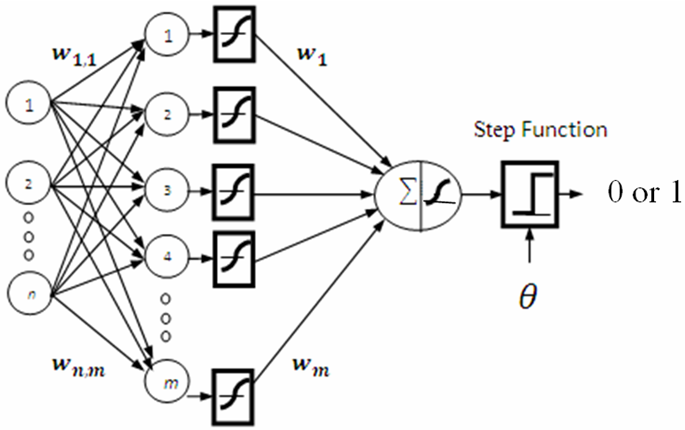

*Nguồn: ResearchGate.net*

Neural Network được tạo nên bởi các lớp (layer) khác nhau, mỗi layer gồm nhiều đơn vị, gọi là neuron. Mỗi neuron này đại diện cho một phương trình toán học và các tham số tương ứng. Neural Network bao gồm 3 kiểu lớp chính:
*   Lớp đầu vào (Input layer): Đây là lớp tiếp nhận data để bắt đầu quá trình phát triển thuật toán. Số neuron ở lớp này bằng với số cột, hay còn gọi là số features trong data của chúng ta.
*   Lớp ẩn (Hidden layer): Neural Network có thể bao gồm 1 hoặc nhiều lớp ẩn. Các lớp này sẽ tiếp nhận kết quả tính toán dưới dạng vector từ lớp đầu vào, rồi tiếp tục tính toán và điều chỉnh tham số ở các neuron.
*   Lớp đầu ra (Output layer): Lớp đầu ra sẽ bao gồm duy nhất 1 neuron, chịu trách nhiệm đưa ra kết quả dự đoán cuối cùng.

### 4b. Cơ chế
Đối với bài toán Binary Classification, ta dùng 3 phương trình chính sau đây cho model.


*   ### Linear
\begin{equation} y = wx + b \end{equation}

Đây sẽ là phương trình được dùng chủ yếu trong các neuron của Input Layer và Hidden Layer. x là data đầu vào, y là kết quả, còn w và b là những tham số. Mục tiêu của Neural Network chính là điều chỉnh w và b sao cho y đạt được như mong muốn.

*   ### ReLU
\begin{equation} \text{ReLU}(x) = \max(0, x)\end{equation}



*   ### Sigmoid
\begin{equation} \sigma(x) = \frac{1}{1 + e^{-x}} \end{equation}


### Sau đây là cách xây dựng một Neural Network 2 lớp

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def ReLU(z):
  return np.maximum(0,z)

def deriv_ReLU(z):
  return (z > 0).astype(z.dtype)

In [ ]:
def initParam():
  W1 = np.random.randn(2, 128) * np.sqrt(2/2)
  b1 = np.random.randn(1, 128) * np.sqrt(2/1)
  W2 = np.random.randn(128, 1) * np.sqrt(2/64)
  b2 = np.random.randn(1, 1) * np.sqrt(2/1)
  return W1, b1, W2, b2

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = X.dot(W1) + b1
  A1 = ReLU(Z1)
  Z2 = A1.dot(W2) + b2
  A2 = sigmoid(Z2)
  return Z1, A1, Z2, A2

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.shape[0]
  #từ lớp đầu ra (output layer)
  dZ2 = A2 - Y
  dW2 = 1/m * np.dot(A1.T, dZ2)
  db2 = 1/m * np.sum(dZ2, 0)
  #từ các lớp ẩn (hidden layer)
  dZ1 =  np.dot(dZ2, W2.T) * deriv_ReLU(Z1)
  dW1 = 1/m * np.dot(X.T, dZ1)
  db1 = 1/m * np.sum(dZ1, 0)

  return dW1, db1, dW2, db2

In [ ]:
def update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 -= alpha*dW1
  b1 -= alpha*db1
  W2 -= alpha*dW2
  b2 -= alpha*db2
  return W1, b1, W2, b2

In [ ]:
def get_accuracy(y_hat, y):
  predictions = (y_hat >= 0.5).astype(int)
  return np.sum(predictions == y) / len(predictions)

def grad_descent(X, Y, epoch, iters, alpha=1e-5):
  W1, b1, W2, b2 = initParam()
  for i in tqdm_notebook(range(epoch), desc='Epoch'):
    print("Epoch ", i+1)
    for j in tqdm_notebook(range(iters), desc='Train step'):
      Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
      dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
      W1, b1, W2, b2 = update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
      if j % 50 == 0:
        print('Iter: ', j, " Loss: ", np.mean((A2-Y) ** 2))
        print('Accuracy: ', get_accuracy(A2, Y))

  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = grad_descent(X_train, y_train, 100, 500)

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch  1


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.5869780227631584
Accuracy:  0.4098073555166375
Iter:  50  Loss:  0.23953378092241345
Accuracy:  0.5901926444833625
Iter:  100  Loss:  0.23770316163472802
Accuracy:  0.5831873905429071
Iter:  150  Loss:  0.23767797394366805
Accuracy:  0.5831873905429071
Iter:  200  Loss:  0.23765287690555226
Accuracy:  0.5831873905429071
Iter:  250  Loss:  0.23762787181842157
Accuracy:  0.5831873905429071
Iter:  300  Loss:  0.23760295776403956
Accuracy:  0.5831873905429071
Iter:  350  Loss:  0.2375781338423719
Accuracy:  0.5831873905429071
Iter:  400  Loss:  0.2375533991712461
Accuracy:  0.5831873905429071
Iter:  450  Loss:  0.23752875288595612
Accuracy:  0.5831873905429071
Epoch  2


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23750419413887802
Accuracy:  0.5831873905429071
Iter:  50  Loss:  0.2374797220990906
Accuracy:  0.5831873905429071
Iter:  100  Loss:  0.2374553359520095
Accuracy:  0.5831873905429071
Iter:  150  Loss:  0.23743104664106957
Accuracy:  0.5831873905429071
Iter:  200  Loss:  0.23740684370921036
Accuracy:  0.5831873905429071
Iter:  250  Loss:  0.23738272419852946
Accuracy:  0.5831873905429071
Iter:  300  Loss:  0.23735868735814467
Accuracy:  0.5831873905429071
Iter:  350  Loss:  0.23733473245174264
Accuracy:  0.5831873905429071
Iter:  400  Loss:  0.2373108587572623
Accuracy:  0.5831873905429071
Iter:  450  Loss:  0.23728706556658227
Accuracy:  0.5831873905429071
Epoch  3


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23726335218521377
Accuracy:  0.5831873905429071
Iter:  50  Loss:  0.23723971793200221
Accuracy:  0.5831873905429071
Iter:  100  Loss:  0.23721616213883562
Accuracy:  0.5831873905429071
Iter:  150  Loss:  0.2371926841503563
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.2371692833236849
Accuracy:  0.5849387040280211
Iter:  250  Loss:  0.2371459590281446
Accuracy:  0.5849387040280211
Iter:  300  Loss:  0.2371227106449961
Accuracy:  0.5849387040280211
Iter:  350  Loss:  0.2370995375671753
Accuracy:  0.5849387040280211
Iter:  400  Loss:  0.23707643919904
Accuracy:  0.5849387040280211
Iter:  450  Loss:  0.2370534149561184
Accuracy:  0.5849387040280211
Epoch  4


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23703046426486782
Accuracy:  0.5849387040280211
Iter:  50  Loss:  0.2370075865624349
Accuracy:  0.5849387040280211
Iter:  100  Loss:  0.2369847812964235
Accuracy:  0.5849387040280211
Iter:  150  Loss:  0.2369620479246669
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.23693938591500563
Accuracy:  0.5849387040280211
Iter:  250  Loss:  0.23691679474506924
Accuracy:  0.5849387040280211
Iter:  300  Loss:  0.23689427390206447
Accuracy:  0.5849387040280211
Iter:  350  Loss:  0.236871822882567
Accuracy:  0.5849387040280211
Iter:  400  Loss:  0.23684944119231827
Accuracy:  0.5849387040280211
Iter:  450  Loss:  0.23682714411546335
Accuracy:  0.5849387040280211
Epoch  5


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23680492309972628
Accuracy:  0.5849387040280211
Iter:  50  Loss:  0.23678276977925597
Accuracy:  0.5849387040280211
Iter:  100  Loss:  0.23676068369744468
Accuracy:  0.5849387040280211
Iter:  150  Loss:  0.23673866440579025
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.23671671146376874
Accuracy:  0.5849387040280211
Iter:  250  Loss:  0.23669482443866235
Accuracy:  0.5849387040280211
Iter:  300  Loss:  0.23667300290539195
Accuracy:  0.5849387040280211
Iter:  350  Loss:  0.23665124644635127
Accuracy:  0.5849387040280211
Iter:  400  Loss:  0.2366295546512467
Accuracy:  0.5849387040280211
Iter:  450  Loss:  0.23660792711694026
Accuracy:  0.5849387040280211
Epoch  6


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23658636344729544
Accuracy:  0.5849387040280211
Iter:  50  Loss:  0.23656486325302678
Accuracy:  0.5849387040280211
Iter:  100  Loss:  0.23654342615155258
Accuracy:  0.5849387040280211
Iter:  150  Loss:  0.23652205176685195
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.23650073972932303
Accuracy:  0.5849387040280211
Iter:  250  Loss:  0.23647948967564628
Accuracy:  0.5849387040280211
Iter:  300  Loss:  0.23645830124864922
Accuracy:  0.5849387040280211
Iter:  350  Loss:  0.2364371740971756
Accuracy:  0.5849387040280211
Iter:  400  Loss:  0.23641610787595668
Accuracy:  0.5849387040280211
Iter:  450  Loss:  0.23639510224548443
Accuracy:  0.5849387040280211
Epoch  7


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23637415687188987
Accuracy:  0.5849387040280211
Iter:  50  Loss:  0.23635327142682197
Accuracy:  0.5849387040280211
Iter:  100  Loss:  0.23633244558732916
Accuracy:  0.5849387040280211
Iter:  150  Loss:  0.23631167359769603
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.2362909599990352
Accuracy:  0.5849387040280211
Iter:  250  Loss:  0.23627030507413097
Accuracy:  0.5849387040280211
Iter:  300  Loss:  0.23624970852089106
Accuracy:  0.5849387040280211
Iter:  350  Loss:  0.23622917004218777
Accuracy:  0.5849387040280211
Iter:  400  Loss:  0.23620868934562544
Accuracy:  0.5849387040280211
Iter:  450  Loss:  0.23618826614344007
Accuracy:  0.5849387040280211
Epoch  8


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23616790015240144
Accuracy:  0.5849387040280211
Iter:  50  Loss:  0.23614759109371594
Accuracy:  0.5849387040280211
Iter:  100  Loss:  0.23612730373726382
Accuracy:  0.5849387040280211
Iter:  150  Loss:  0.2361070646688564
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.2360868819845903
Accuracy:  0.5849387040280211
Iter:  250  Loss:  0.2360667554191722
Accuracy:  0.5849387040280211
Iter:  300  Loss:  0.23604668471138227
Accuracy:  0.5849387040280211
Iter:  350  Loss:  0.236026669603972
Accuracy:  0.5849387040280211
Iter:  400  Loss:  0.23600670984358027
Accuracy:  0.5849387040280211
Iter:  450  Loss:  0.2359868051806492
Accuracy:  0.5849387040280211
Epoch  9


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23596695536934623
Accuracy:  0.5849387040280211
Iter:  50  Loss:  0.23594716016748257
Accuracy:  0.5849387040280211
Iter:  100  Loss:  0.23592741933643813
Accuracy:  0.5849387040280211
Iter:  150  Loss:  0.23590773264108522
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.23588809984971434
Accuracy:  0.5849387040280211
Iter:  250  Loss:  0.2358685207339623
Accuracy:  0.5849387040280211
Iter:  300  Loss:  0.2358489950687413
Accuracy:  0.5849387040280211
Iter:  350  Loss:  0.23582952263217
Accuracy:  0.5849387040280211
Iter:  400  Loss:  0.23581010320550533
Accuracy:  0.5849387040280211
Iter:  450  Loss:  0.23579073657307606
Accuracy:  0.5849387040280211
Epoch  10


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23577142252221917
Accuracy:  0.5849387040280211
Iter:  50  Loss:  0.23575216084321415
Accuracy:  0.5849387040280211
Iter:  100  Loss:  0.23573295132922314
Accuracy:  0.5849387040280211
Iter:  150  Loss:  0.2357137937762283
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.23569468798297324
Accuracy:  0.5849387040280211
Iter:  250  Loss:  0.2356756337509043
Accuracy:  0.5849387040280211
Iter:  300  Loss:  0.23565663088411387
Accuracy:  0.5849387040280211
Iter:  350  Loss:  0.23563767918928408
Accuracy:  0.5849387040280211
Iter:  400  Loss:  0.2356187784756326
Accuracy:  0.5849387040280211
Iter:  450  Loss:  0.23559992855485914
Accuracy:  0.5866900175131349
Epoch  11


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23558112924109217
Accuracy:  0.5866900175131349
Iter:  50  Loss:  0.23556238035083882
Accuracy:  0.5866900175131349
Iter:  100  Loss:  0.23554371363623364
Accuracy:  0.5866900175131349
Iter:  150  Loss:  0.23552511154659259
Accuracy:  0.5866900175131349
Iter:  200  Loss:  0.23550655905907297
Accuracy:  0.5866900175131349
Iter:  250  Loss:  0.235488056002607
Accuracy:  0.5866900175131349
Iter:  300  Loss:  0.2354695578202438
Accuracy:  0.5866900175131349
Iter:  350  Loss:  0.23545110552929582
Accuracy:  0.5866900175131349
Iter:  400  Loss:  0.23543270242645017
Accuracy:  0.5866900175131349
Iter:  450  Loss:  0.2354143483456516
Accuracy:  0.5866900175131349
Epoch  12


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23539604312281234
Accuracy:  0.5866900175131349
Iter:  50  Loss:  0.23537778659576422
Accuracy:  0.5866900175131349
Iter:  100  Loss:  0.23535957860421883
Accuracy:  0.5866900175131349
Iter:  150  Loss:  0.2353414189897264
Accuracy:  0.5866900175131349
Iter:  200  Loss:  0.23532330759563921
Accuracy:  0.5866900175131349
Iter:  250  Loss:  0.2353052442670713
Accuracy:  0.5866900175131349
Iter:  300  Loss:  0.23528722885086192
Accuracy:  0.5866900175131349
Iter:  350  Loss:  0.2352692611955399
Accuracy:  0.5866900175131349
Iter:  400  Loss:  0.23525134115128646
Accuracy:  0.5866900175131349
Iter:  450  Loss:  0.23523346856990146
Accuracy:  0.5866900175131349
Epoch  13


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23521564330476855
Accuracy:  0.5866900175131349
Iter:  50  Loss:  0.2351978652108213
Accuracy:  0.5866900175131349
Iter:  100  Loss:  0.23518013414451125
Accuracy:  0.5866900175131349
Iter:  150  Loss:  0.23516241059717483
Accuracy:  0.5866900175131349
Iter:  200  Loss:  0.23514472707874196
Accuracy:  0.5866900175131349
Iter:  250  Loss:  0.23512709040736565
Accuracy:  0.5866900175131349
Iter:  300  Loss:  0.23510950044273657
Accuracy:  0.5884413309982487
Iter:  350  Loss:  0.23509195704596794
Accuracy:  0.5884413309982487
Iter:  400  Loss:  0.23507446007955404
Accuracy:  0.5884413309982487
Iter:  450  Loss:  0.23505700940734175
Accuracy:  0.5884413309982487
Epoch  14


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2350396048945004
Accuracy:  0.5884413309982487
Iter:  50  Loss:  0.23502224640749492
Accuracy:  0.5884413309982487
Iter:  100  Loss:  0.23500493381405738
Accuracy:  0.5884413309982487
Iter:  150  Loss:  0.23498766698316065
Accuracy:  0.5884413309982487
Iter:  200  Loss:  0.23497044578499057
Accuracy:  0.5884413309982487
Iter:  250  Loss:  0.234953270090922
Accuracy:  0.5884413309982487
Iter:  300  Loss:  0.2349361397734918
Accuracy:  0.5884413309982487
Iter:  350  Loss:  0.23491905834085935
Accuracy:  0.5884413309982487
Iter:  400  Loss:  0.23490202349876357
Accuracy:  0.5884413309982487
Iter:  450  Loss:  0.23488503363048713
Accuracy:  0.5884413309982487
Epoch  15


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2348680886132489
Accuracy:  0.5884413309982487
Iter:  50  Loss:  0.2348511947961138
Accuracy:  0.5884413309982487
Iter:  100  Loss:  0.2348343588940382
Accuracy:  0.5884413309982487
Iter:  150  Loss:  0.23481757071475745
Accuracy:  0.5884413309982487
Iter:  200  Loss:  0.23480086647242715
Accuracy:  0.5884413309982487
Iter:  250  Loss:  0.23478420734105018
Accuracy:  0.5884413309982487
Iter:  300  Loss:  0.23476759216582932
Accuracy:  0.5884413309982487
Iter:  350  Loss:  0.23475102083322522
Accuracy:  0.5884413309982487
Iter:  400  Loss:  0.23473449323066922
Accuracy:  0.5884413309982487
Iter:  450  Loss:  0.23471800924641342
Accuracy:  0.5884413309982487
Epoch  16


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23470156876951212
Accuracy:  0.5884413309982487
Iter:  50  Loss:  0.23468517168980432
Accuracy:  0.5884413309982487
Iter:  100  Loss:  0.23466881789789756
Accuracy:  0.5919439579684763
Iter:  150  Loss:  0.23465250728515064
Accuracy:  0.5919439579684763
Iter:  200  Loss:  0.23463623974365838
Accuracy:  0.5919439579684763
Iter:  250  Loss:  0.23462001516623354
Accuracy:  0.5901926444833625
Iter:  300  Loss:  0.23460383344639393
Accuracy:  0.5901926444833625
Iter:  350  Loss:  0.23458769447834552
Accuracy:  0.5901926444833625
Iter:  400  Loss:  0.23457159815696754
Accuracy:  0.5901926444833625
Iter:  450  Loss:  0.23455554437779907
Accuracy:  0.5901926444833625
Epoch  17


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23453953303702307
Accuracy:  0.5901926444833625
Iter:  50  Loss:  0.23452356403145347
Accuracy:  0.5901926444833625
Iter:  100  Loss:  0.23450763725852147
Accuracy:  0.5901926444833625
Iter:  150  Loss:  0.23449175261626107
Accuracy:  0.5901926444833625
Iter:  200  Loss:  0.23447593713300555
Accuracy:  0.5901926444833625
Iter:  250  Loss:  0.23446017840514605
Accuracy:  0.5901926444833625
Iter:  300  Loss:  0.23444446128948634
Accuracy:  0.5901926444833625
Iter:  350  Loss:  0.23442878568859138
Accuracy:  0.5901926444833625
Iter:  400  Loss:  0.234413151505391
Accuracy:  0.5901926444833625
Iter:  450  Loss:  0.23439755864330403
Accuracy:  0.5901926444833625
Epoch  18


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23438200700622852
Accuracy:  0.5901926444833625
Iter:  50  Loss:  0.23436649649853053
Accuracy:  0.5901926444833625
Iter:  100  Loss:  0.23435102702503385
Accuracy:  0.5919439579684763
Iter:  150  Loss:  0.23433559849101057
Accuracy:  0.5919439579684763
Iter:  200  Loss:  0.23432021080216978
Accuracy:  0.5919439579684763
Iter:  250  Loss:  0.23430486386465033
Accuracy:  0.5919439579684763
Iter:  300  Loss:  0.2342895575850095
Accuracy:  0.5919439579684763
Iter:  350  Loss:  0.23427429187021392
Accuracy:  0.5919439579684763
Iter:  400  Loss:  0.23425906662763155
Accuracy:  0.5919439579684763
Iter:  450  Loss:  0.2342438817650218
Accuracy:  0.5919439579684763
Epoch  19


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2342287371905283
Accuracy:  0.5919439579684763
Iter:  50  Loss:  0.23421363281266813
Accuracy:  0.5919439579684763
Iter:  100  Loss:  0.2341985685403261
Accuracy:  0.5919439579684763
Iter:  150  Loss:  0.2341835442827453
Accuracy:  0.5919439579684763
Iter:  200  Loss:  0.234168559949519
Accuracy:  0.5919439579684763
Iter:  250  Loss:  0.23415361545058375
Accuracy:  0.5919439579684763
Iter:  300  Loss:  0.23413871069621126
Accuracy:  0.5919439579684763
Iter:  350  Loss:  0.2341238519971184
Accuracy:  0.5919439579684763
Iter:  400  Loss:  0.23410905740200075
Accuracy:  0.5919439579684763
Iter:  450  Loss:  0.2340943020505264
Accuracy:  0.5919439579684763
Epoch  20


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23407958586947242
Accuracy:  0.5919439579684763
Iter:  50  Loss:  0.23406490877268138
Accuracy:  0.5901926444833625
Iter:  100  Loss:  0.23405027067425518
Accuracy:  0.5901926444833625
Iter:  150  Loss:  0.23403567148854804
Accuracy:  0.5901926444833625
Iter:  200  Loss:  0.2340211111301615
Accuracy:  0.5901926444833625
Iter:  250  Loss:  0.23400658782264577
Accuracy:  0.5866900175131349
Iter:  300  Loss:  0.2339920783456719
Accuracy:  0.5866900175131349
Iter:  350  Loss:  0.23397760765207176
Accuracy:  0.5884413309982487
Iter:  400  Loss:  0.2339631756168861
Accuracy:  0.5936952714535902
Iter:  450  Loss:  0.23394878215440096
Accuracy:  0.5936952714535902
Epoch  21


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23393442717914564
Accuracy:  0.5936952714535902
Iter:  50  Loss:  0.23392011060588605
Accuracy:  0.5936952714535902
Iter:  100  Loss:  0.23390583234962023
Accuracy:  0.5919439579684763
Iter:  150  Loss:  0.23389159232557252
Accuracy:  0.5919439579684763
Iter:  200  Loss:  0.23387739044918868
Accuracy:  0.5919439579684763
Iter:  250  Loss:  0.23386322663613185
Accuracy:  0.5936952714535902
Iter:  300  Loss:  0.23384910080227686
Accuracy:  0.5936952714535902
Iter:  350  Loss:  0.23383501286370617
Accuracy:  0.5936952714535902
Iter:  400  Loss:  0.2338209627367056
Accuracy:  0.5936952714535902
Iter:  450  Loss:  0.233806950337759
Accuracy:  0.5936952714535902
Epoch  22


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23379297558354534
Accuracy:  0.5936952714535902
Iter:  50  Loss:  0.23377903839093347
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2337651386769779
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23375127635891674
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.2337374513541648
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.2337236635803129
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23370991295512183
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23369619939651992
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2336825228225996
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23366888315161352
Accuracy:  0.5954465849387041
Epoch  23


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23365528030197125
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23364171419223678
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2336281847411241
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.2336146918674954
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23360123549035766
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23358781552885896
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23357443190228688
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23356108453006547
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2335477733317512
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.2335344982270329
Accuracy:  0.5954465849387041
Epoch  24


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23352125913572655
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23350805597777488
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2334948886732436
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.2334817571423202
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23346866130531038
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23345560108263755
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23344257639483917
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23342958716256512
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2334166333065764
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23340371474774224
Accuracy:  0.5954465849387041
Epoch  25


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23339083140703848
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23337798320554667
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23336517006445037
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23335239190503537
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23333964864868711
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23332694021688888
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23331426653122123
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23330162751335862
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23328902308507055
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23327645316821793
Accuracy:  0.5954465849387041
Epoch  26


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23326391768475274
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23325141655671658
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2332389497062394
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23322651705553793
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23321409844162827
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23320169271578586
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23318932114587285
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23317698365220307
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2331646801559574
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23315241057842373
Accuracy:  0.5954465849387041
Epoch  27


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23314017484099384
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.2331279728651631
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23311580457252826
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23310366988478723
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23309156872373676
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23307950101127123
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23306748539961847
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23305551727843063
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23304358221747237
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.2330316801405334
Accuracy:  0.5954465849387041
Epoch  28


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2330198109711732
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23300797463302336
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23299617104978593
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23298440014523408
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23297266184321042
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23296095606762857
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23294928274246976
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23293764179178558
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23292603313969537
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23291445671038696
Accuracy:  0.5954465849387041
Epoch  29


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23290291242811612
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23289140021720686
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2328799200020496
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23286847170710304
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.232857055256892
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.2328456705760089
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23283431758911244
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23282299622092803
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23281170639624763
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23280044803992925
Accuracy:  0.5954465849387041
Epoch  30


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23278922107689753
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.2327780254321431
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23276686103072278
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23275572779775996
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.2327446256584437
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23273355453802977
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23272251436183944
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23271150505526084
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2327005265437486
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23268957875282348
Accuracy:  0.5954465849387041
Epoch  31


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23267866160807277
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23266777503515035
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23265691895977733
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23264609330774116
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.2326352980048968
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.2326245329771663
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23261379815053904
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.2326030934510723
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23259241880489132
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23258177413818865
Accuracy:  0.5954465849387041
Epoch  32


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23257115937722586
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23256057444833275
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2325500192779081
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23253949379241973
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.2325289979184045
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23251853158246888
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23250809471128994
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23249768723161393
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23248730907025858
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23247696015411182
Accuracy:  0.5954465849387041
Epoch  33


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2324666404101328
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23245634976535248
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23244608814687354
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23243585548187068
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23242565169759144
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23241547672135607
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23240533048055823
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.2323952129026652
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23238512391521832
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23237506460161803
Accuracy:  0.5954465849387041
Epoch  34


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2323650347310176
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23235503319998707
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2323450599367524
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23233511486951208
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23232519792653814
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23231530903617628
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23230544812684695
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.2322956151270453
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23228580996534237
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23227603257038448
Accuracy:  0.5954465849387041
Epoch  35


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23226628287089496
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23225656079567333
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23224686627359706
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23223719923362163
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23222755960477987
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23221794731618467
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23220836229702754
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23219880447658015
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23218927378419474
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.2321797701493039
Accuracy:  0.5954465849387041
Epoch  36


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23217029350142196
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23216084377014518
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23215142088515206
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23214202477620402
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23213265537314587
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.2321233126059066
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.2321139964044991
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23210470669902186
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23209544341965846
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23208621757584855
Accuracy:  0.5954465849387041
Epoch  37


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23207702568063843
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23206785988698433
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2320587201264072
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23204960633027516
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.2320405184300344
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23203145635720976
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23202242004340454
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23201340942030352
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2320044244196704
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23199546497335163
Accuracy:  0.5954465849387041
Epoch  38


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23198653101327477
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.2319776224714507
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2319687392799734
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23195988137102133
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23195104867685712
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.2319422411298293
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23193345866237236
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23192470120700764
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23191596869634387
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.2319072610630777
Accuracy:  0.5954465849387041
Epoch  39


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23189857823999444
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23188992015996882
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23188128675596587
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23187267796104052
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23186409370833921
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23185553393110025
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23184699856265417
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23183848753642466
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23183000078592916
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23182153824477866
Accuracy:  0.5954465849387041
Epoch  40


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23181309984667967
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.2318046855254334
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23179629521493764
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23178792884918592
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23177958636226953
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23177126768837666
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23176297276179417
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23175470151690747
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23174645388820098
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23173822981025907
Accuracy:  0.5954465849387041
Epoch  41


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2317300292177666
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23172185204550863
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23171369822837215
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.2317055677013454
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23169746039951986
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23168937625808875
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.2316813152123495
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.2316732771977026
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2316652621496536
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.2316572700038122
Accuracy:  0.5954465849387041
Epoch  42


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23164930069589348
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23164135416171883
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23163343033721495
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23162552915841542
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23161765056146152
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23160979448260136
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.2316019608581909
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23159414962469493
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23158636071868718
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23157859407685039
Accuracy:  0.5954465849387041
Epoch  43


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23157084963597668
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23156312733296858
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23155542710483915
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.231547748888712
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23154009262182262
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23153245824151758
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.2315248456852557
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.2315172548906084
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23150968579525952
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.2315021383370065
Accuracy:  0.5954465849387041
Epoch  44


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2314946124537602
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23148710808354542
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23147962516450082
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23147216363488024
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.2314647234330522
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23145730449750068
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23144990676682492
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23144253017974026
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2314351746750788
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23142784019178844
Accuracy:  0.5954465849387041
Epoch  45


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2314205266689345
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23141323404569974
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23140596226138377
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23139871125540443
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23139148096729767
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23138427133671763
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23137708230343754
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23136991380734911
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23136276578846393
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23135563818691232
Accuracy:  0.5954465849387041
Epoch  46


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23134853094294494
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.2313414439969319
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2313343772893648
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.2313273307608543
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.231320304352133
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23131329800405365
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23130631165759102
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23129934239559943
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23129238432769272
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.2312854461711203
Accuracy:  0.5954465849387041
Epoch  47


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23127852786101988
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23127162933851925
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23126475054487516
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23125789142147182
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23125105190982134
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23124423195156485
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23123743148847162
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23123065046243915
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23122388881549366
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23121714648979003
Accuracy:  0.5954465849387041
Epoch  48


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23121042342761172
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23120371957137098
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2311970348636093
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.2311903692469964
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23118372266433201
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.2311770950585438
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23117048637268978
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23116389654995628
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23115733329866542
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23115079052293458
Accuracy:  0.5954465849387041
Epoch  49


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23114426637217364
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.23113776079050838
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.2311312737221733
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23112480511152758
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.23111835490305588
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.2311119230413677
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23110550947119898
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.23109911413741036
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.2310927369849884
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23108637795904596
Accuracy:  0.5954465849387041
Epoch  50


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23108003700482155
Accuracy:  0.5954465849387041
Iter:  50  Loss:  0.2310737140676794
Accuracy:  0.5954465849387041
Iter:  100  Loss:  0.23106740909311035
Accuracy:  0.5954465849387041
Iter:  150  Loss:  0.23106112202673132
Accuracy:  0.5954465849387041
Iter:  200  Loss:  0.2310548528142855
Accuracy:  0.5954465849387041
Iter:  250  Loss:  0.23104860140164232
Accuracy:  0.5954465849387041
Iter:  300  Loss:  0.23104236773479786
Accuracy:  0.5954465849387041
Iter:  350  Loss:  0.231036151759875
Accuracy:  0.5954465849387041
Iter:  400  Loss:  0.23102995342312277
Accuracy:  0.5954465849387041
Iter:  450  Loss:  0.23102377267091717
Accuracy:  0.5954465849387041
Epoch  51


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23101760944976096
Accuracy:  0.5971978984238179
Iter:  50  Loss:  0.23101146370628337
Accuracy:  0.5971978984238179
Iter:  100  Loss:  0.23100533538724116
Accuracy:  0.5971978984238179
Iter:  150  Loss:  0.23099922443951756
Accuracy:  0.5971978984238179
Iter:  200  Loss:  0.23099313081012296
Accuracy:  0.5971978984238179
Iter:  250  Loss:  0.2309870544461947
Accuracy:  0.5971978984238179
Iter:  300  Loss:  0.23098099529499705
Accuracy:  0.5971978984238179
Iter:  350  Loss:  0.23097495330392145
Accuracy:  0.5971978984238179
Iter:  400  Loss:  0.2309689284204869
Accuracy:  0.5971978984238179
Iter:  450  Loss:  0.23096292059233908
Accuracy:  0.5971978984238179
Epoch  52


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23095692976725093
Accuracy:  0.5971978984238179
Iter:  50  Loss:  0.23095095589312303
Accuracy:  0.5971978984238179
Iter:  100  Loss:  0.2309449989179826
Accuracy:  0.5971978984238179
Iter:  150  Loss:  0.23093905878998433
Accuracy:  0.5971978984238179
Iter:  200  Loss:  0.23093313545741095
Accuracy:  0.5971978984238179
Iter:  250  Loss:  0.2309272288686711
Accuracy:  0.5971978984238179
Iter:  300  Loss:  0.2309213389723018
Accuracy:  0.5971978984238179
Iter:  350  Loss:  0.23091546571696697
Accuracy:  0.5971978984238179
Iter:  400  Loss:  0.230909609051458
Accuracy:  0.5971978984238179
Iter:  450  Loss:  0.23090376892469325
Accuracy:  0.5971978984238179
Epoch  53


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23089794528571855
Accuracy:  0.5971978984238179
Iter:  50  Loss:  0.23089213808370723
Accuracy:  0.5971978984238179
Iter:  100  Loss:  0.2308863472679597
Accuracy:  0.5971978984238179
Iter:  150  Loss:  0.23088057278790355
Accuracy:  0.5971978984238179
Iter:  200  Loss:  0.23087481459309372
Accuracy:  0.5971978984238179
Iter:  250  Loss:  0.23086907263321257
Accuracy:  0.5971978984238179
Iter:  300  Loss:  0.230863346858069
Accuracy:  0.5971978984238179
Iter:  350  Loss:  0.23085763721760025
Accuracy:  0.5971978984238179
Iter:  400  Loss:  0.2308519436618691
Accuracy:  0.5971978984238179
Iter:  450  Loss:  0.23084626614106687
Accuracy:  0.5971978984238179
Epoch  54


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23084060460551115
Accuracy:  0.5971978984238179
Iter:  50  Loss:  0.2308349590056469
Accuracy:  0.5971978984238179
Iter:  100  Loss:  0.23082932929204575
Accuracy:  0.5971978984238179
Iter:  150  Loss:  0.2308237154154067
Accuracy:  0.5971978984238179
Iter:  200  Loss:  0.2308181173265552
Accuracy:  0.5971978984238179
Iter:  250  Loss:  0.23081253497644377
Accuracy:  0.5971978984238179
Iter:  300  Loss:  0.23080696831615177
Accuracy:  0.5971978984238179
Iter:  350  Loss:  0.23080141729688528
Accuracy:  0.5971978984238179
Iter:  400  Loss:  0.23079588186997663
Accuracy:  0.6007005253940455
Iter:  450  Loss:  0.23079036198688532
Accuracy:  0.6007005253940455
Epoch  55


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23078485759919717
Accuracy:  0.6007005253940455
Iter:  50  Loss:  0.2307793686586244
Accuracy:  0.6007005253940455
Iter:  100  Loss:  0.23077389511700566
Accuracy:  0.6007005253940455
Iter:  150  Loss:  0.23076843692630614
Accuracy:  0.6007005253940455
Iter:  200  Loss:  0.23076299403861686
Accuracy:  0.6007005253940455
Iter:  250  Loss:  0.2307575664061555
Accuracy:  0.6007005253940455
Iter:  300  Loss:  0.2307521539812654
Accuracy:  0.6007005253940455
Iter:  350  Loss:  0.23074675671641623
Accuracy:  0.6007005253940455
Iter:  400  Loss:  0.2307413745642034
Accuracy:  0.6007005253940455
Iter:  450  Loss:  0.23073600747734838
Accuracy:  0.6007005253940455
Epoch  56


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23073065540869822
Accuracy:  0.6007005253940455
Iter:  50  Loss:  0.23072531831122534
Accuracy:  0.6007005253940455
Iter:  100  Loss:  0.23071999613802846
Accuracy:  0.6007005253940455
Iter:  150  Loss:  0.23071468884233115
Accuracy:  0.6007005253940455
Iter:  200  Loss:  0.23070939637748228
Accuracy:  0.6007005253940455
Iter:  250  Loss:  0.23070411869695676
Accuracy:  0.6007005253940455
Iter:  300  Loss:  0.2306988557543537
Accuracy:  0.6007005253940455
Iter:  350  Loss:  0.23069360032397546
Accuracy:  0.6007005253940455
Iter:  400  Loss:  0.23068835391927547
Accuracy:  0.6007005253940455
Iter:  450  Loss:  0.23068312212436867
Accuracy:  0.6007005253940455
Epoch  57


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.230677904894492
Accuracy:  0.6007005253940455
Iter:  50  Loss:  0.23067270218379596
Accuracy:  0.6007005253940455
Iter:  100  Loss:  0.2306675139465563
Accuracy:  0.6007005253940455
Iter:  150  Loss:  0.23066234013717404
Accuracy:  0.6007005253940455
Iter:  200  Loss:  0.23065718071017544
Accuracy:  0.6007005253940455
Iter:  250  Loss:  0.23065203562021197
Accuracy:  0.6007005253940455
Iter:  300  Loss:  0.23064690482205977
Accuracy:  0.6007005253940455
Iter:  350  Loss:  0.23064178827061974
Accuracy:  0.6007005253940455
Iter:  400  Loss:  0.23063668592091757
Accuracy:  0.6007005253940455
Iter:  450  Loss:  0.23063159772810338
Accuracy:  0.6007005253940455
Epoch  58


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23062652364745115
Accuracy:  0.6007005253940455
Iter:  50  Loss:  0.23062146363435937
Accuracy:  0.6007005253940455
Iter:  100  Loss:  0.23061641764435073
Accuracy:  0.6007005253940455
Iter:  150  Loss:  0.2306113856330712
Accuracy:  0.6007005253940455
Iter:  200  Loss:  0.23060636755629088
Accuracy:  0.6007005253940455
Iter:  250  Loss:  0.2306013633699031
Accuracy:  0.6007005253940455
Iter:  300  Loss:  0.2305963730299248
Accuracy:  0.6007005253940455
Iter:  350  Loss:  0.230591396492496
Accuracy:  0.6007005253940455
Iter:  400  Loss:  0.23058643371387955
Accuracy:  0.6007005253940455
Iter:  450  Loss:  0.2305814846504614
Accuracy:  0.6007005253940455
Epoch  59


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2305765492587501
Accuracy:  0.6007005253940455
Iter:  50  Loss:  0.23057162749537718
Accuracy:  0.6007005253940455
Iter:  100  Loss:  0.23056671931709555
Accuracy:  0.6007005253940455
Iter:  150  Loss:  0.2305618246807813
Accuracy:  0.6007005253940455
Iter:  200  Loss:  0.23055694354343184
Accuracy:  0.6007005253940455
Iter:  250  Loss:  0.23055207586216692
Accuracy:  0.6007005253940455
Iter:  300  Loss:  0.2305472215942278
Accuracy:  0.6007005253940455
Iter:  350  Loss:  0.23054238069697697
Accuracy:  0.6007005253940455
Iter:  400  Loss:  0.23053755312789864
Accuracy:  0.6007005253940455
Iter:  450  Loss:  0.2305327388445981
Accuracy:  0.6007005253940455
Epoch  60


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2305279378048011
Accuracy:  0.6007005253940455
Iter:  50  Loss:  0.23052314996635517
Accuracy:  0.6007005253940455
Iter:  100  Loss:  0.23051837528722727
Accuracy:  0.6007005253940455
Iter:  150  Loss:  0.2305136137255055
Accuracy:  0.6007005253940455
Iter:  200  Loss:  0.2305088652393979
Accuracy:  0.6007005253940455
Iter:  250  Loss:  0.23050412978723314
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.23049940732745866
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.2304946978186428
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.23049000121947222
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.23048531748875364
Accuracy:  0.6059544658493871
Epoch  61


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23048064658541267
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.23047598846849368
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.23047134309715994
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.23046670620312074
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.23046207858614143
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.23045746365091563
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.23045286135652204
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.23044827166242016
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.23044369452819013
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.23043912991353188
Accuracy:  0.6059544658493871
Epoch  62


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23043457777826512
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.2304300380823293
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.23042551078578302
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.23042099584880396
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.2304164932316886
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.2304120028948521
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.23040752479882756
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.23040305890426635
Accuracy:  0.6094570928196147
Iter:  400  Loss:  0.2303986051719377
Accuracy:  0.6094570928196147
Iter:  450  Loss:  0.23039416356272835
Accuracy:  0.6094570928196147
Epoch  63


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23038973403764212
Accuracy:  0.6094570928196147
Iter:  50  Loss:  0.23038531655780017
Accuracy:  0.6094570928196147
Iter:  100  Loss:  0.23038091108444025
Accuracy:  0.6094570928196147
Iter:  150  Loss:  0.23037651757891658
Accuracy:  0.6094570928196147
Iter:  200  Loss:  0.2303721360027001
Accuracy:  0.6094570928196147
Iter:  250  Loss:  0.23036776631737735
Accuracy:  0.6094570928196147
Iter:  300  Loss:  0.2303634084846504
Accuracy:  0.6094570928196147
Iter:  350  Loss:  0.2303590624663379
Accuracy:  0.6094570928196147
Iter:  400  Loss:  0.23035472822437245
Accuracy:  0.6094570928196147
Iter:  450  Loss:  0.230350405720803
Accuracy:  0.6094570928196147
Epoch  64


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2303460949177921
Accuracy:  0.6094570928196147
Iter:  50  Loss:  0.23034179577761768
Accuracy:  0.6094570928196147
Iter:  100  Loss:  0.23033750826267133
Accuracy:  0.6094570928196147
Iter:  150  Loss:  0.23033323233545935
Accuracy:  0.6094570928196147
Iter:  200  Loss:  0.2303289679586012
Accuracy:  0.6094570928196147
Iter:  250  Loss:  0.23032471509483016
Accuracy:  0.6094570928196147
Iter:  300  Loss:  0.23032047370699252
Accuracy:  0.6094570928196147
Iter:  350  Loss:  0.23031624375804793
Accuracy:  0.6094570928196147
Iter:  400  Loss:  0.23031202521106875
Accuracy:  0.6094570928196147
Iter:  450  Loss:  0.23030781802923966
Accuracy:  0.6094570928196147
Epoch  65


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23030362217585765
Accuracy:  0.6094570928196147
Iter:  50  Loss:  0.23029943761433197
Accuracy:  0.6094570928196147
Iter:  100  Loss:  0.2302952643081833
Accuracy:  0.6094570928196147
Iter:  150  Loss:  0.23029110222104393
Accuracy:  0.6094570928196147
Iter:  200  Loss:  0.2302869513166575
Accuracy:  0.6094570928196147
Iter:  250  Loss:  0.2302828115588786
Accuracy:  0.6094570928196147
Iter:  300  Loss:  0.23027868291167253
Accuracy:  0.6094570928196147
Iter:  350  Loss:  0.2302745653391152
Accuracy:  0.6094570928196147
Iter:  400  Loss:  0.23027045880539238
Accuracy:  0.6094570928196147
Iter:  450  Loss:  0.23026636327480046
Accuracy:  0.6094570928196147
Epoch  66


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23026227871174518
Accuracy:  0.6094570928196147
Iter:  50  Loss:  0.23025820508074174
Accuracy:  0.6094570928196147
Iter:  100  Loss:  0.23025414234641456
Accuracy:  0.6094570928196147
Iter:  150  Loss:  0.23025009047349737
Accuracy:  0.6094570928196147
Iter:  200  Loss:  0.230246049426832
Accuracy:  0.6094570928196147
Iter:  250  Loss:  0.23024201917136955
Accuracy:  0.6094570928196147
Iter:  300  Loss:  0.23023799967216874
Accuracy:  0.6094570928196147
Iter:  350  Loss:  0.2302339908943964
Accuracy:  0.6094570928196147
Iter:  400  Loss:  0.230229992803327
Accuracy:  0.6094570928196147
Iter:  450  Loss:  0.23022600536434282
Accuracy:  0.6094570928196147
Epoch  67


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23022202854293305
Accuracy:  0.6094570928196147
Iter:  50  Loss:  0.23021806230469383
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.2302141066153278
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.2302101614406446
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.23020622674655966
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.23020230249909465
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.23019838866437625
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.23019448520863722
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.23019059209821538
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.23018670929955332
Accuracy:  0.6059544658493871
Epoch  68


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23018283677919818
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.23017897450380212
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.23017512244012045
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.23017128055501332
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.2301674488154442
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.23016362718848002
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.2301598156412902
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.230156014141148
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.23015222265542884
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.23014844115161093
Accuracy:  0.6059544658493871
Epoch  69


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2301446695972735
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.230140907960099
Accuracy:  0.6024518388791593
Iter:  100  Loss:  0.23013715620787076
Accuracy:  0.6024518388791593
Iter:  150  Loss:  0.23013341430847353
Accuracy:  0.6024518388791593
Iter:  200  Loss:  0.23012968222989344
Accuracy:  0.6024518388791593
Iter:  250  Loss:  0.23012595994021723
Accuracy:  0.6024518388791593
Iter:  300  Loss:  0.23012224740763237
Accuracy:  0.6024518388791593
Iter:  350  Loss:  0.23011854460042644
Accuracy:  0.6024518388791593
Iter:  400  Loss:  0.23011485148698738
Accuracy:  0.6024518388791593
Iter:  450  Loss:  0.23011116803580287
Accuracy:  0.6024518388791593
Epoch  70


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23010749421546017
Accuracy:  0.6024518388791593
Iter:  50  Loss:  0.23010382999464596
Accuracy:  0.6024518388791593
Iter:  100  Loss:  0.23010017534214608
Accuracy:  0.6024518388791593
Iter:  150  Loss:  0.23009653022684456
Accuracy:  0.6024518388791593
Iter:  200  Loss:  0.2300928946177251
Accuracy:  0.6024518388791593
Iter:  250  Loss:  0.2300892684838687
Accuracy:  0.6024518388791593
Iter:  300  Loss:  0.23008565179445492
Accuracy:  0.6024518388791593
Iter:  350  Loss:  0.230082044518761
Accuracy:  0.6024518388791593
Iter:  400  Loss:  0.2300784466261619
Accuracy:  0.6024518388791593
Iter:  450  Loss:  0.23007485808613
Accuracy:  0.6024518388791593
Epoch  71


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23007127886823406
Accuracy:  0.6024518388791593
Iter:  50  Loss:  0.2300677089421402
Accuracy:  0.6024518388791593
Iter:  100  Loss:  0.2300641482776113
Accuracy:  0.6024518388791593
Iter:  150  Loss:  0.23006059684450597
Accuracy:  0.6024518388791593
Iter:  200  Loss:  0.23005705461277917
Accuracy:  0.6024518388791593
Iter:  250  Loss:  0.2300535215524817
Accuracy:  0.6024518388791593
Iter:  300  Loss:  0.23004999763375966
Accuracy:  0.6024518388791593
Iter:  350  Loss:  0.23004648282685464
Accuracy:  0.6024518388791593
Iter:  400  Loss:  0.23004297710210322
Accuracy:  0.6024518388791593
Iter:  450  Loss:  0.2300394804299367
Accuracy:  0.6024518388791593
Epoch  72


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2300359927808813
Accuracy:  0.6024518388791593
Iter:  50  Loss:  0.23003251412555678
Accuracy:  0.6024518388791593
Iter:  100  Loss:  0.23002904443467756
Accuracy:  0.6024518388791593
Iter:  150  Loss:  0.23002558367905157
Accuracy:  0.6024518388791593
Iter:  200  Loss:  0.23002213182958048
Accuracy:  0.6024518388791593
Iter:  250  Loss:  0.2300186888572589
Accuracy:  0.6024518388791593
Iter:  300  Loss:  0.23001525473317452
Accuracy:  0.6024518388791593
Iter:  350  Loss:  0.23001182942850873
Accuracy:  0.6024518388791593
Iter:  400  Loss:  0.2300084129145337
Accuracy:  0.6024518388791593
Iter:  450  Loss:  0.23000500516261554
Accuracy:  0.6024518388791593
Epoch  73


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23000160614421133
Accuracy:  0.6024518388791593
Iter:  50  Loss:  0.22999821583087046
Accuracy:  0.6024518388791593
Iter:  100  Loss:  0.22999483419423375
Accuracy:  0.6024518388791593
Iter:  150  Loss:  0.22999146120603314
Accuracy:  0.6024518388791593
Iter:  200  Loss:  0.22998809683809168
Accuracy:  0.6024518388791593
Iter:  250  Loss:  0.22998474106232358
Accuracy:  0.6024518388791593
Iter:  300  Loss:  0.2299813938507329
Accuracy:  0.6024518388791593
Iter:  350  Loss:  0.2299780551754142
Accuracy:  0.6024518388791593
Iter:  400  Loss:  0.22997472500855273
Accuracy:  0.6024518388791593
Iter:  450  Loss:  0.22997140332242264
Accuracy:  0.6059544658493871
Epoch  74


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.229968090089388
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.22996478528190245
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.22996148887250814
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.22995820083383636
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.22995492113860694
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.2299516497596282
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.22994838666979578
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.22994513184209422
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.22994188524959466
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.22993864686545606
Accuracy:  0.6059544658493871
Epoch  75


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22993541666292466
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.22993219461533287
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.2299289806961005
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.22992577487873272
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.2299225771368221
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.22991938744404586
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.22991620577416752
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.2299130321010358
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.22990986639858454
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.22990670864083249
Accuracy:  0.6059544658493871
Epoch  76


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.229903558801883
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.2299004168559239
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.2298972827772272
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.22989415654014866
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.229891038119128
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.2298879274886883
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.22988482462343543
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.22988172949805927
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.22987864208733097
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.2298755623661054
Accuracy:  0.6059544658493871
Epoch  77


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2298724903093192
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.22986942589199083
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.22986636908922084
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.22986331987619119
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.2298602782281649
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.22985724412048675
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.2298542175285817
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.22985120272617177
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.2298481953151362
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.2298451953344016
Accuracy:  0.6059544658493871
Epoch  78


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2298422027186052
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.22983921742137337
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.22983623944470255
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.2298332687685042
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.22983030536720367
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.22982734921616427
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.22982440026577153
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.22982145854884756
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.22981852398658165
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.22981559657958095
Accuracy:  0.6059544658493871
Epoch  79


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2298126763102726
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.2298097631532736
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.22980685708636697
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.2298039580543699
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.2298010660987706
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.22979818113493805
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.22979530316820795
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.22979243217713688
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.2297895681391186
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.2297867110303456
Accuracy:  0.6059544658493871
Epoch  80


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22978386080683913
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.2297810174960965
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.22977818101625985
Accuracy:  0.6059544658493871
Iter:  150  Loss:  0.2297753513813588
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.2297725285659711
Accuracy:  0.6077057793345009
Iter:  250  Loss:  0.22976971254703218
Accuracy:  0.6077057793345009
Iter:  300  Loss:  0.22976690327784122
Accuracy:  0.6077057793345009
Iter:  350  Loss:  0.22976410079054602
Accuracy:  0.6077057793345009
Iter:  400  Loss:  0.22976130500839423
Accuracy:  0.6077057793345009
Iter:  450  Loss:  0.22975851593452812
Accuracy:  0.6077057793345009
Epoch  81


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2297557335832929
Accuracy:  0.6077057793345009
Iter:  50  Loss:  0.22975295786898794
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.22975018875855274
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.22974742631102282
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.2297446704401921
Accuracy:  0.6077057793345009
Iter:  250  Loss:  0.22974192117431674
Accuracy:  0.6077057793345009
Iter:  300  Loss:  0.22973917844310152
Accuracy:  0.6077057793345009
Iter:  350  Loss:  0.22973644225187806
Accuracy:  0.6077057793345009
Iter:  400  Loss:  0.2297337125769291
Accuracy:  0.6077057793345009
Iter:  450  Loss:  0.2297309893993553
Accuracy:  0.6077057793345009
Epoch  82


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22972827270008175
Accuracy:  0.6077057793345009
Iter:  50  Loss:  0.22972556242555772
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.2297228586198713
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.2297201611857858
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.22971747015321306
Accuracy:  0.6077057793345009
Iter:  250  Loss:  0.22971478549203916
Accuracy:  0.6077057793345009
Iter:  300  Loss:  0.22971210718155302
Accuracy:  0.6077057793345009
Iter:  350  Loss:  0.22970943518076867
Accuracy:  0.6077057793345009
Iter:  400  Loss:  0.22970676951187974
Accuracy:  0.6077057793345009
Iter:  450  Loss:  0.22970411010922212
Accuracy:  0.6077057793345009
Epoch  83


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22970145700021988
Accuracy:  0.6077057793345009
Iter:  50  Loss:  0.22969881011495127
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.22969616946093796
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.2296935350179606
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.22969090674079476
Accuracy:  0.6077057793345009
Iter:  250  Loss:  0.22968828465133478
Accuracy:  0.6077057793345009
Iter:  300  Loss:  0.22968566872920615
Accuracy:  0.6077057793345009
Iter:  350  Loss:  0.2296830588835236
Accuracy:  0.6077057793345009
Iter:  400  Loss:  0.22968045516280652
Accuracy:  0.6077057793345009
Iter:  450  Loss:  0.22967785753328546
Accuracy:  0.6077057793345009
Epoch  84


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22967526597144788
Accuracy:  0.6077057793345009
Iter:  50  Loss:  0.22967268046148132
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.22967010096474832
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.22966752749658711
Accuracy:  0.6059544658493871
Iter:  200  Loss:  0.22966496000138945
Accuracy:  0.6059544658493871
Iter:  250  Loss:  0.2296623985147503
Accuracy:  0.6059544658493871
Iter:  300  Loss:  0.229659842939141
Accuracy:  0.6059544658493871
Iter:  350  Loss:  0.22965729330706192
Accuracy:  0.6059544658493871
Iter:  400  Loss:  0.22965474955971749
Accuracy:  0.6059544658493871
Iter:  450  Loss:  0.22965221173752637
Accuracy:  0.6059544658493871
Epoch  85


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22964967979293727
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.22964715368658084
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.22964463345782835
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.22964211899965506
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.2296396103526984
Accuracy:  0.6077057793345009
Iter:  250  Loss:  0.22963710749899588
Accuracy:  0.6077057793345009
Iter:  300  Loss:  0.22963461037545888
Accuracy:  0.6077057793345009
Iter:  350  Loss:  0.22963211902486388
Accuracy:  0.6077057793345009
Iter:  400  Loss:  0.22962963341709983
Accuracy:  0.6077057793345009
Iter:  450  Loss:  0.2296271534709349
Accuracy:  0.6077057793345009
Epoch  86


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22962467923201743
Accuracy:  0.6077057793345009
Iter:  50  Loss:  0.22962221066411478
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.22961974775078128
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.22961729047225016
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.22961483881166503
Accuracy:  0.6077057793345009
Iter:  250  Loss:  0.22961239276857123
Accuracy:  0.6077057793345009
Iter:  300  Loss:  0.22960995225824213
Accuracy:  0.6077057793345009
Iter:  350  Loss:  0.22960751732826132
Accuracy:  0.6077057793345009
Iter:  400  Loss:  0.22960508797066234
Accuracy:  0.6077057793345009
Iter:  450  Loss:  0.2296026641078689
Accuracy:  0.6077057793345009
Epoch  87


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22960024576292482
Accuracy:  0.6077057793345009
Iter:  50  Loss:  0.22959783291801125
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.22959542550121234
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.2295930235782592
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.22959062708069564
Accuracy:  0.6077057793345009
Iter:  250  Loss:  0.22958823603580647
Accuracy:  0.6077057793345009
Iter:  300  Loss:  0.22958585034851053
Accuracy:  0.6077057793345009
Iter:  350  Loss:  0.22958347006191854
Accuracy:  0.6077057793345009
Iter:  400  Loss:  0.22958109514913635
Accuracy:  0.6077057793345009
Iter:  450  Loss:  0.22957872560211676
Accuracy:  0.6077057793345009
Epoch  88


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22957636134869192
Accuracy:  0.6077057793345009
Iter:  50  Loss:  0.22957400243906795
Accuracy:  0.6077057793345009
Iter:  100  Loss:  0.22957164882170242
Accuracy:  0.6077057793345009
Iter:  150  Loss:  0.22956930051000524
Accuracy:  0.6077057793345009
Iter:  200  Loss:  0.2295669574282641
Accuracy:  0.6077057793345009
Iter:  250  Loss:  0.22956461961162883
Accuracy:  0.6077057793345009
Iter:  300  Loss:  0.22956228702638068
Accuracy:  0.6077057793345009
Iter:  350  Loss:  0.22955995966765158
Accuracy:  0.6077057793345009
Iter:  400  Loss:  0.22955763748017602
Accuracy:  0.6077057793345009
Iter:  450  Loss:  0.22955532049418484
Accuracy:  0.6077057793345009
Epoch  89


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22955300866602932
Accuracy:  0.6077057793345009
Iter:  50  Loss:  0.22955070200094135
Accuracy:  0.6094570928196147
Iter:  100  Loss:  0.22954840044926755
Accuracy:  0.6094570928196147
Iter:  150  Loss:  0.22954610402158862
Accuracy:  0.6094570928196147
Iter:  200  Loss:  0.22954381269209342
Accuracy:  0.6094570928196147
Iter:  250  Loss:  0.2295415264446119
Accuracy:  0.6094570928196147
Iter:  300  Loss:  0.2295392452899663
Accuracy:  0.6094570928196147
Iter:  350  Loss:  0.2295369691333822
Accuracy:  0.6094570928196147
Iter:  400  Loss:  0.22953469805705987
Accuracy:  0.6094570928196147
Iter:  450  Loss:  0.22953243196211745
Accuracy:  0.6094570928196147
Epoch  90


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22953017088340869
Accuracy:  0.6094570928196147
Iter:  50  Loss:  0.2295279147945335
Accuracy:  0.6094570928196147
Iter:  100  Loss:  0.22952566367504304
Accuracy:  0.6094570928196147
Iter:  150  Loss:  0.22952341750891234
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.2295211762843793
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22951894000444847
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22951670857943232
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22951448210571512
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22951226045071535
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.229510043669217
Accuracy:  0.6112084063047285
Epoch  91


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22950783174082373
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.22950562464278212
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.22950342237266763
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.22950122486379282
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.22949903216004353
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.229496844219247
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22949466105066887
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22949248258476296
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22949030885636232
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.22948813983430358
Accuracy:  0.6112084063047285
Epoch  92


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22948597550942887
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.22948381587608815
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.22948166085467442
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.22947951052669047
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.22947736479546396
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22947522370093992
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.2294730872349585
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22947095532457248
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.2294688279964884
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.22946670519258627
Accuracy:  0.6112084063047285
Epoch  93


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22946458695851035
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.22946247327944477
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.22946036407099388
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.22945825941836143
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.2294561592018155
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22945406346570724
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.2294519721944369
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22944988537369532
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22944780298922254
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.2294457249863906
Accuracy:  0.6112084063047285
Epoch  94


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22944365140727319
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.22944158221162786
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.22943951740829394
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.22943745692564518
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.22943540081221833
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22943334902856435
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22943130156094518
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22942925841116327
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22942721956162754
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.22942518493295191
Accuracy:  0.6112084063047285
Epoch  95


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22942315463186844
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.22942112852086335
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.22941910667267976
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.2294170890491609
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.2294150756353562
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22941306641674855
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22941106137885248
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22940906052882917
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22940706380127923
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.22940507124293083
Accuracy:  0.6112084063047285
Epoch  96


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22940308279445723
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.22940109850722817
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.22939911827693796
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.22939714214556164
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.22939517009790011
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22939320212228786
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22939123815461449
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22938927826470112
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22938732238983858
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.229385370544661
Accuracy:  0.6112084063047285
Epoch  97


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22938342267463205
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.22938147880821083
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.2293795389531864
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.2293776030231727
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.22937567100462114
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22937374296017646
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22937181885808983
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22936989863970977
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22936798234341155
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.22936606991825004
Accuracy:  0.6112084063047285
Epoch  98


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22936416141167953
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.2293622567227268
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.2293603558928612
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.2293584589080389
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.22935656575835897
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.2293546763780537
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22935279084153468
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.229350909120671
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22934903111651886
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.2293471569021555
Accuracy:  0.6112084063047285
Epoch  99


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2293452864874079
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.2293434197688907
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.22934155678916748
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.22933969753480193
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.22933784199622814
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22933599010198905
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22933414194835233
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22933229743557862
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.2293304566175337
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.22932861941111599
Accuracy:  0.6112084063047285
Epoch  100


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22932678586552904
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.22932495598142505
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.22932312967344914
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.22932130697489478
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.22931948782472178
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.22931767229831457
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.22931586036416218
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.22931405193584983
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.22931224711296244
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.2293104457739654
Accuracy:  0.6112084063047285


In [ ]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 128)
(1, 128)
(128, 1)
(1, 1)


Sau khi train xong, ta cần lưu lại weight của model dưới dạng .npz - một dạng zip file của Numpy.

In [ ]:
np.savez("/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/2Layers_model_parameters.npz", W1=W1, b1=b1, W2=W2, b2=b2)

Khi nào bạn muốn sử dụng lại weight đã được train từ model, bạn có thể load lại từ file .npz. Như thế bạn có thể tránh được việc phải train lại model từ đầu.

In [ ]:
#chỉ chạy cell này nếu bạn không muốn train lại model
saved_params = np.load("/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/2Layers_model_parameters.npz")
W1 = saved_params['W1']
b1 = saved_params['b1']
W2 = saved_params['W2']
b2 = saved_params['b2']

In [ ]:
def make_predict(W1, b1, W2, b2, X):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = (A2 >= 0.5).astype(int)
  return predictions

def test_predict(W1, b1, W2, b2, index):
  prediction = make_predict(W1, b1, W2, b2, X_val[index])
  result = "Sống!" if prediction == 1 else "Chết!"
  print("Hành khách số:", index)
  print("Kết quả dự đoán:", result)
  print("Số người đi cùng:", X_val[index,0], "\nTuổi:", X_val[index,1])
  label = y_val[index][0]
  print("Nhãn (sự thật):", label)

In [ ]:
test_predict(W1, b1, W2, b2, 10)

Hành khách số: 10
Kết quả dự đoán: Sống!
Số người đi cùng: 2.0 
Tuổi: 3.0
Nhãn (sự thật): 1


In [ ]:
test_predict(W1, b1, W2, b2, 15)

Hành khách số: 15
Kết quả dự đoán: Chết!
Số người đi cùng: 0.0 
Tuổi: 30.0
Nhãn (sự thật): 1


In [ ]:
print("Tỉ lệ dự đoán chính xác:",get_accuracy(make_predict(W1, b1, W2, b2, X_val), y_val))

Tỉ lệ dự đoán chính xác: 0.6573426573426573


### Sau đây ta sẽ có một Neural Network 4 lớp

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def ReLU(z):
  return np.maximum(0,z)

def deriv_ReLU(z):
  return (z > 0).astype(z.dtype)

In [ ]:
def initParam():
  W1 = np.random.randn(2, 128) * np.sqrt(2/2)  #initialise with He method
  b1 = np.random.randn(1, 128) * 10
  W2 = np.random.randn(128, 64) * np.sqrt(2/128)
  b2 = np.random.randn(1, 64) * 10
  W3 = np.random.randn(64, 32) * np.sqrt(2/64)
  b3 = np.random.randn(1, 32) * 10
  W4 = np.random.randn(32, 1) * np.sqrt(2/32)
  b4 = np.random.randn(1, 1) * 10

  return W1, b1, W2, b2, W3, b3, W4, b4

In [ ]:
def forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X):
  Z1 = X.dot(W1) + b1
  A1 = ReLU(Z1)
  Z2 = A1.dot(W2) + b2
  A2 = ReLU(Z2)
  Z3 = A2.dot(W3) + b3
  A3 = ReLU(Z3)
  Z4 = A3.dot(W4) + b4
  A4 = sigmoid(Z4)
  return Z1, A1, Z2, A2, Z3, A3, Z4, A4

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W2, Z3, A3, W3, Z4, A4, W4, X, Y):
  m = Y.shape[0]
  #từ lớp đầu ra (output layer)
  dZ4 = A4 - Y
  dW4 = 1/m * np.dot(A3.T, dZ4)
  db4 = 1/m * np.sum(dZ4, 0)
  #từ các lớp ẩn (hidden layer)
  dZ3 = np.dot(dZ4, W4.T) * deriv_ReLU(Z3)
  dW3 = 1/m * np.dot(A2.T, dZ3)
  db3 = 1/m * np.sum(dZ3, 0)
  dZ2 = np.dot(dZ3, W3.T) * deriv_ReLU(Z2)
  dW2 = 1/m * np.dot(A1.T, dZ2)
  db2 = 1/m * np.sum(dZ2, 0)
  #từ lớp đầu tiên (đầu vào)
  dZ1 = np.dot(dZ2, W2.T) * deriv_ReLU(Z1)
  dW1 = 1/m * np.dot(X.T, dZ1)
  db1 = 1/m * np.sum(dZ1, 0)

  return dW1, db1, dW2, db2, dW3, db3, dW4, db4

In [ ]:
def update_param(W1, b1, W2, b2, W3, b3, W4, b4, dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha):
  W1 -= alpha*dW1
  b1 -= alpha*db1
  W2 -= alpha*dW2
  b2 -= alpha*db2
  W3 -= alpha*dW3
  b3 -= alpha*db3
  W4 -= alpha*dW4
  b4 -= alpha*db4

  return W1, b1, W2, b2, W3, b3, W4, b4

In [ ]:
def get_accuracy(y_hat, y):
  predictions = (y_hat >= 0.5).astype(int)
  return np.sum(predictions == y) / len(predictions)

def grad_descent(X, Y, epoch, iters, alpha=1e-5):
  W1, b1, W2, b2, W3, b3, W4, b4 = initParam()
  for i in tqdm_notebook(range(epoch), desc='Epoch'):
    print("Epoch ", i+1)
    for j in tqdm_notebook(range(iters), desc='Train step'):
      Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X)
      dW1, db1, dW2, db2, dW3, db3, dW4, db4 = backward_prop(Z1, A1, Z2, A2, W2, Z3, A3, W3, Z4, A4, W4, X, Y)
      W1, b1, W2, b2, W3, b3, W4, b4 = update_param(W1, b1, W2, b2, W3, b3, W4, b4, dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha)
      if j % 50 == 0:
        print('Iter: ', j, " Loss: ", np.mean((A4-Y) ** 2))
        print('Accuracy: ', get_accuracy(A4, Y))

  return W1, b1, W2, b2, W3, b3, W4, b4

In [ ]:
W1, b1, W2, b2, W3, b3, W4, b4 = grad_descent(X_train, y_train, 100, 500)

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch  1


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.565073856201242
Accuracy:  0.4133099824868651
Iter:  50  Loss:  0.4258076712113046
Accuracy:  0.51138353765324
Iter:  100  Loss:  0.3908600090018652
Accuracy:  0.5306479859894921
Iter:  150  Loss:  0.3703497555938007
Accuracy:  0.5446584938704028
Iter:  200  Loss:  0.3576167006871052
Accuracy:  0.5236427320490368
Iter:  250  Loss:  0.35032025545776463
Accuracy:  0.5183887915936952
Iter:  300  Loss:  0.3448798503594571
Accuracy:  0.51138353765324
Iter:  350  Loss:  0.3398922724617195
Accuracy:  0.5043782837127846
Iter:  400  Loss:  0.33564992495502277
Accuracy:  0.5043782837127846
Iter:  450  Loss:  0.3321900930755192
Accuracy:  0.5078809106830122
Epoch  2


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.3289591908255864
Accuracy:  0.5096322241681261
Iter:  50  Loss:  0.32604167601807155
Accuracy:  0.5096322241681261
Iter:  100  Loss:  0.3233316016407078
Accuracy:  0.51138353765324
Iter:  150  Loss:  0.32056681486887606
Accuracy:  0.5183887915936952
Iter:  200  Loss:  0.3176774979998153
Accuracy:  0.5236427320490368
Iter:  250  Loss:  0.314907908000865
Accuracy:  0.5271453590192644
Iter:  300  Loss:  0.3118795021317677
Accuracy:  0.5359019264448336
Iter:  350  Loss:  0.308627696687649
Accuracy:  0.5359019264448336
Iter:  400  Loss:  0.30526877525162377
Accuracy:  0.5306479859894921
Iter:  450  Loss:  0.3020038269450941
Accuracy:  0.5394045534150613
Epoch  3


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.29919192161745645
Accuracy:  0.5394045534150613
Iter:  50  Loss:  0.29651468947973414
Accuracy:  0.5359019264448336
Iter:  100  Loss:  0.29411951546282855
Accuracy:  0.532399299474606
Iter:  150  Loss:  0.29178502221198677
Accuracy:  0.532399299474606
Iter:  200  Loss:  0.28946427404106523
Accuracy:  0.5376532399299475
Iter:  250  Loss:  0.28731927332666657
Accuracy:  0.5376532399299475
Iter:  300  Loss:  0.2852009316232928
Accuracy:  0.5271453590192644
Iter:  350  Loss:  0.2832559558986404
Accuracy:  0.5288966725043783
Iter:  400  Loss:  0.2814561938755904
Accuracy:  0.5306479859894921
Iter:  450  Loss:  0.27990925555489976
Accuracy:  0.5464098073555166
Epoch  4


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.27854787166642975
Accuracy:  0.5359019264448336
Iter:  50  Loss:  0.2773430477771921
Accuracy:  0.5376532399299475
Iter:  100  Loss:  0.27624720078045817
Accuracy:  0.5288966725043783
Iter:  150  Loss:  0.27519459301136123
Accuracy:  0.5288966725043783
Iter:  200  Loss:  0.27413922970035093
Accuracy:  0.5288966725043783
Iter:  250  Loss:  0.27312786086419816
Accuracy:  0.5253940455341506
Iter:  300  Loss:  0.272157718285103
Accuracy:  0.5271453590192644
Iter:  350  Loss:  0.27122049205313636
Accuracy:  0.521891418563923
Iter:  400  Loss:  0.27032399420304903
Accuracy:  0.5253940455341506
Iter:  450  Loss:  0.26945698546315333
Accuracy:  0.521891418563923
Epoch  5


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.26863535589667076
Accuracy:  0.5288966725043783
Iter:  50  Loss:  0.2678513227560806
Accuracy:  0.5341506129597198
Iter:  100  Loss:  0.2670875061941991
Accuracy:  0.532399299474606
Iter:  150  Loss:  0.2663422805655713
Accuracy:  0.5341506129597198
Iter:  200  Loss:  0.26560778201441665
Accuracy:  0.5341506129597198
Iter:  250  Loss:  0.2648895271538838
Accuracy:  0.5288966725043783
Iter:  300  Loss:  0.26416878034223396
Accuracy:  0.532399299474606
Iter:  350  Loss:  0.2634803967893339
Accuracy:  0.5306479859894921
Iter:  400  Loss:  0.26281782317932895
Accuracy:  0.5446584938704028
Iter:  450  Loss:  0.2621972428281368
Accuracy:  0.5446584938704028
Epoch  6


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.26159877459459735
Accuracy:  0.5516637478108581
Iter:  50  Loss:  0.26101766115561587
Accuracy:  0.5551663747810858
Iter:  100  Loss:  0.26047685404114196
Accuracy:  0.5551663747810858
Iter:  150  Loss:  0.25996681258165916
Accuracy:  0.5551663747810858
Iter:  200  Loss:  0.2594645272580653
Accuracy:  0.5551663747810858
Iter:  250  Loss:  0.2589676188933504
Accuracy:  0.5569176882661997
Iter:  300  Loss:  0.25848186366199516
Accuracy:  0.5569176882661997
Iter:  350  Loss:  0.2579773972002402
Accuracy:  0.5569176882661997
Iter:  400  Loss:  0.25749430716478805
Accuracy:  0.5586690017513135
Iter:  450  Loss:  0.2570254054900487
Accuracy:  0.5586690017513135
Epoch  7


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.25657394225125113
Accuracy:  0.5586690017513135
Iter:  50  Loss:  0.2561448602247059
Accuracy:  0.5586690017513135
Iter:  100  Loss:  0.2557096901604665
Accuracy:  0.5586690017513135
Iter:  150  Loss:  0.2552784979500148
Accuracy:  0.5586690017513135
Iter:  200  Loss:  0.25489026670146525
Accuracy:  0.5586690017513135
Iter:  250  Loss:  0.25448354275357815
Accuracy:  0.5621716287215411
Iter:  300  Loss:  0.25408890238309073
Accuracy:  0.5621716287215411
Iter:  350  Loss:  0.25368368200828945
Accuracy:  0.5621716287215411
Iter:  400  Loss:  0.2533034471190894
Accuracy:  0.5621716287215411
Iter:  450  Loss:  0.2529482186540442
Accuracy:  0.5621716287215411
Epoch  8


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2526076968347007
Accuracy:  0.563922942206655
Iter:  50  Loss:  0.2522725209173528
Accuracy:  0.563922942206655
Iter:  100  Loss:  0.2519413982268056
Accuracy:  0.563922942206655
Iter:  150  Loss:  0.2515192895379178
Accuracy:  0.563922942206655
Iter:  200  Loss:  0.2510614458995708
Accuracy:  0.563922942206655
Iter:  250  Loss:  0.2506251453640672
Accuracy:  0.5656742556917689
Iter:  300  Loss:  0.25022069671568575
Accuracy:  0.5656742556917689
Iter:  350  Loss:  0.24984545918867912
Accuracy:  0.5674255691768827
Iter:  400  Loss:  0.24948975878134289
Accuracy:  0.563922942206655
Iter:  450  Loss:  0.2491489355860574
Accuracy:  0.5674255691768827
Epoch  9


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.24881076138305183
Accuracy:  0.5674255691768827
Iter:  50  Loss:  0.24850788096602008
Accuracy:  0.5674255691768827
Iter:  100  Loss:  0.2481856279794188
Accuracy:  0.5674255691768827
Iter:  150  Loss:  0.24785402621286778
Accuracy:  0.5691768826619965
Iter:  200  Loss:  0.24754988634832345
Accuracy:  0.5656742556917689
Iter:  250  Loss:  0.2472485525811753
Accuracy:  0.5709281961471103
Iter:  300  Loss:  0.24697498170489374
Accuracy:  0.5709281961471103
Iter:  350  Loss:  0.24672414011782495
Accuracy:  0.5709281961471103
Iter:  400  Loss:  0.2464832207299252
Accuracy:  0.5709281961471103
Iter:  450  Loss:  0.24627131599361224
Accuracy:  0.5709281961471103
Epoch  10


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.24607065447245946
Accuracy:  0.5709281961471103
Iter:  50  Loss:  0.24587199094133735
Accuracy:  0.5726795096322241
Iter:  100  Loss:  0.24567999091072018
Accuracy:  0.5726795096322241
Iter:  150  Loss:  0.2454938219791521
Accuracy:  0.5726795096322241
Iter:  200  Loss:  0.24531210988020866
Accuracy:  0.5726795096322241
Iter:  250  Loss:  0.24513390077997466
Accuracy:  0.5726795096322241
Iter:  300  Loss:  0.2449574761101962
Accuracy:  0.5726795096322241
Iter:  350  Loss:  0.24478737847049534
Accuracy:  0.5726795096322241
Iter:  400  Loss:  0.24461980995249044
Accuracy:  0.5726795096322241
Iter:  450  Loss:  0.2444542741365442
Accuracy:  0.5814360770577933
Epoch  11


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.24429093057950707
Accuracy:  0.5814360770577933
Iter:  50  Loss:  0.2441324234615163
Accuracy:  0.5814360770577933
Iter:  100  Loss:  0.2439759489803314
Accuracy:  0.5814360770577933
Iter:  150  Loss:  0.24382220719197065
Accuracy:  0.5814360770577933
Iter:  200  Loss:  0.24367365285825465
Accuracy:  0.5831873905429071
Iter:  250  Loss:  0.24352219153642715
Accuracy:  0.5831873905429071
Iter:  300  Loss:  0.24337123436016705
Accuracy:  0.5831873905429071
Iter:  350  Loss:  0.24322146692769928
Accuracy:  0.5831873905429071
Iter:  400  Loss:  0.2430746325628068
Accuracy:  0.5831873905429071
Iter:  450  Loss:  0.24293492704020922
Accuracy:  0.5831873905429071
Epoch  12


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2428005051652936
Accuracy:  0.5831873905429071
Iter:  50  Loss:  0.2426674509356597
Accuracy:  0.5849387040280211
Iter:  100  Loss:  0.24253559573806086
Accuracy:  0.5849387040280211
Iter:  150  Loss:  0.24240468605476131
Accuracy:  0.5849387040280211
Iter:  200  Loss:  0.2422749105222142
Accuracy:  0.5884413309982487
Iter:  250  Loss:  0.24214605420985955
Accuracy:  0.5884413309982487
Iter:  300  Loss:  0.24202200270677698
Accuracy:  0.5884413309982487
Iter:  350  Loss:  0.24189950232347865
Accuracy:  0.5884413309982487
Iter:  400  Loss:  0.2417777344324514
Accuracy:  0.5884413309982487
Iter:  450  Loss:  0.24165588299728546
Accuracy:  0.5884413309982487
Epoch  13


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.24153360817517694
Accuracy:  0.5884413309982487
Iter:  50  Loss:  0.24141342947897756
Accuracy:  0.5884413309982487
Iter:  100  Loss:  0.24129749997274152
Accuracy:  0.5901926444833625
Iter:  150  Loss:  0.24118269456926822
Accuracy:  0.5919439579684763
Iter:  200  Loss:  0.24106866750489314
Accuracy:  0.5936952714535902
Iter:  250  Loss:  0.24095468537092152
Accuracy:  0.5936952714535902
Iter:  300  Loss:  0.24084151920497654
Accuracy:  0.5936952714535902
Iter:  350  Loss:  0.24072906390165572
Accuracy:  0.5971978984238179
Iter:  400  Loss:  0.24062114077581784
Accuracy:  0.5971978984238179
Iter:  450  Loss:  0.24051634010922399
Accuracy:  0.5971978984238179
Epoch  14


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2404123583779633
Accuracy:  0.5971978984238179
Iter:  50  Loss:  0.240308846630592
Accuracy:  0.6007005253940455
Iter:  100  Loss:  0.24020626396232791
Accuracy:  0.6007005253940455
Iter:  150  Loss:  0.24010408707509961
Accuracy:  0.6024518388791593
Iter:  200  Loss:  0.24000234582958976
Accuracy:  0.6024518388791593
Iter:  250  Loss:  0.23990147209203158
Accuracy:  0.6024518388791593
Iter:  300  Loss:  0.23980150278834936
Accuracy:  0.6024518388791593
Iter:  350  Loss:  0.2397028003305673
Accuracy:  0.6024518388791593
Iter:  400  Loss:  0.2396048064800927
Accuracy:  0.6042031523642732
Iter:  450  Loss:  0.2395091578874909
Accuracy:  0.6059544658493871
Epoch  15


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.239414075260175
Accuracy:  0.6059544658493871
Iter:  50  Loss:  0.2393198126321829
Accuracy:  0.6059544658493871
Iter:  100  Loss:  0.23922617503891114
Accuracy:  0.6094570928196147
Iter:  150  Loss:  0.23913326573232427
Accuracy:  0.6094570928196147
Iter:  200  Loss:  0.23904097912484526
Accuracy:  0.6094570928196147
Iter:  250  Loss:  0.2389515241590986
Accuracy:  0.6094570928196147
Iter:  300  Loss:  0.23886455577261861
Accuracy:  0.6112084063047285
Iter:  350  Loss:  0.23877886818566596
Accuracy:  0.6112084063047285
Iter:  400  Loss:  0.23869361431523856
Accuracy:  0.6112084063047285
Iter:  450  Loss:  0.23860904269947614
Accuracy:  0.6112084063047285
Epoch  16


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23852504298791308
Accuracy:  0.6112084063047285
Iter:  50  Loss:  0.23844182727435617
Accuracy:  0.6112084063047285
Iter:  100  Loss:  0.23835890520415037
Accuracy:  0.6112084063047285
Iter:  150  Loss:  0.23827668393519316
Accuracy:  0.6112084063047285
Iter:  200  Loss:  0.23819490220930867
Accuracy:  0.6112084063047285
Iter:  250  Loss:  0.23811371858544023
Accuracy:  0.6112084063047285
Iter:  300  Loss:  0.23803304087960983
Accuracy:  0.6147110332749562
Iter:  350  Loss:  0.23795286916882713
Accuracy:  0.6147110332749562
Iter:  400  Loss:  0.23787353144857193
Accuracy:  0.6147110332749562
Iter:  450  Loss:  0.2377945220512695
Accuracy:  0.6147110332749562
Epoch  17


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23771615012706684
Accuracy:  0.6147110332749562
Iter:  50  Loss:  0.23763822628668993
Accuracy:  0.6147110332749562
Iter:  100  Loss:  0.2375606332410964
Accuracy:  0.6147110332749562
Iter:  150  Loss:  0.23748357858866936
Accuracy:  0.6147110332749562
Iter:  200  Loss:  0.23740660698852292
Accuracy:  0.6147110332749562
Iter:  250  Loss:  0.2373303731342409
Accuracy:  0.6129597197898424
Iter:  300  Loss:  0.23725402801349912
Accuracy:  0.6129597197898424
Iter:  350  Loss:  0.237178060100197
Accuracy:  0.6129597197898424
Iter:  400  Loss:  0.23710240244949835
Accuracy:  0.6129597197898424
Iter:  450  Loss:  0.23702726104577934
Accuracy:  0.6129597197898424
Epoch  18


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2369527819652367
Accuracy:  0.6129597197898424
Iter:  50  Loss:  0.2368788722922987
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.23680570057260888
Accuracy:  0.6199649737302977
Iter:  150  Loss:  0.23673284647472678
Accuracy:  0.6199649737302977
Iter:  200  Loss:  0.23666024766831142
Accuracy:  0.6199649737302977
Iter:  250  Loss:  0.236587246248536
Accuracy:  0.6199649737302977
Iter:  300  Loss:  0.23651444872839825
Accuracy:  0.6199649737302977
Iter:  350  Loss:  0.23644200044584684
Accuracy:  0.6199649737302977
Iter:  400  Loss:  0.23637034356638537
Accuracy:  0.6199649737302977
Iter:  450  Loss:  0.236299429322416
Accuracy:  0.6199649737302977
Epoch  19


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23622878565069327
Accuracy:  0.6199649737302977
Iter:  50  Loss:  0.23615798039614636
Accuracy:  0.6199649737302977
Iter:  100  Loss:  0.23608852673623118
Accuracy:  0.6199649737302977
Iter:  150  Loss:  0.23601980924682603
Accuracy:  0.6182136602451839
Iter:  200  Loss:  0.235951414414938
Accuracy:  0.6182136602451839
Iter:  250  Loss:  0.23588343593599947
Accuracy:  0.6182136602451839
Iter:  300  Loss:  0.2358158454491075
Accuracy:  0.6182136602451839
Iter:  350  Loss:  0.23574872645299721
Accuracy:  0.6182136602451839
Iter:  400  Loss:  0.23568184176536217
Accuracy:  0.6164623467600701
Iter:  450  Loss:  0.23561407948370353
Accuracy:  0.6164623467600701
Epoch  20


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2355466185526577
Accuracy:  0.6164623467600701
Iter:  50  Loss:  0.235479239333213
Accuracy:  0.6164623467600701
Iter:  100  Loss:  0.23541214725561885
Accuracy:  0.6164623467600701
Iter:  150  Loss:  0.23534538810724695
Accuracy:  0.6164623467600701
Iter:  200  Loss:  0.23527892474434786
Accuracy:  0.6199649737302977
Iter:  250  Loss:  0.2352127614446921
Accuracy:  0.6182136602451839
Iter:  300  Loss:  0.2351464460050845
Accuracy:  0.6182136602451839
Iter:  350  Loss:  0.23508020162018367
Accuracy:  0.6182136602451839
Iter:  400  Loss:  0.23501444489825557
Accuracy:  0.6182136602451839
Iter:  450  Loss:  0.23494895507398036
Accuracy:  0.6182136602451839
Epoch  21


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23488382070687566
Accuracy:  0.6182136602451839
Iter:  50  Loss:  0.23481883074546678
Accuracy:  0.6182136602451839
Iter:  100  Loss:  0.2347541369501692
Accuracy:  0.6182136602451839
Iter:  150  Loss:  0.23468970327190863
Accuracy:  0.6182136602451839
Iter:  200  Loss:  0.23462525147387248
Accuracy:  0.6182136602451839
Iter:  250  Loss:  0.23456119436116635
Accuracy:  0.6182136602451839
Iter:  300  Loss:  0.23449744053272642
Accuracy:  0.6182136602451839
Iter:  350  Loss:  0.23443400321967026
Accuracy:  0.6182136602451839
Iter:  400  Loss:  0.23437160386338332
Accuracy:  0.6182136602451839
Iter:  450  Loss:  0.23431025546557402
Accuracy:  0.6182136602451839
Epoch  22


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23424909512820943
Accuracy:  0.6182136602451839
Iter:  50  Loss:  0.23418831868711937
Accuracy:  0.6182136602451839
Iter:  100  Loss:  0.2341277857378041
Accuracy:  0.6182136602451839
Iter:  150  Loss:  0.2340586573996438
Accuracy:  0.6182136602451839
Iter:  200  Loss:  0.2339898583701118
Accuracy:  0.6182136602451839
Iter:  250  Loss:  0.23392187577057375
Accuracy:  0.6182136602451839
Iter:  300  Loss:  0.23385420194333545
Accuracy:  0.6182136602451839
Iter:  350  Loss:  0.23378702798499484
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.2337196984354887
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.23365192244689087
Accuracy:  0.6217162872154116
Epoch  23


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23358468170474486
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.2335187153190767
Accuracy:  0.6182136602451839
Iter:  100  Loss:  0.2334537044886255
Accuracy:  0.6182136602451839
Iter:  150  Loss:  0.23338842585560898
Accuracy:  0.6199649737302977
Iter:  200  Loss:  0.23332368875933074
Accuracy:  0.6199649737302977
Iter:  250  Loss:  0.2332594469957582
Accuracy:  0.6199649737302977
Iter:  300  Loss:  0.23319624489711108
Accuracy:  0.6199649737302977
Iter:  350  Loss:  0.23313425606028243
Accuracy:  0.6199649737302977
Iter:  400  Loss:  0.2330727716774226
Accuracy:  0.6199649737302977
Iter:  450  Loss:  0.23301165505022564
Accuracy:  0.6199649737302977
Epoch  24


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23295096001019802
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.23289063205944463
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.23283069209567717
Accuracy:  0.6217162872154116
Iter:  150  Loss:  0.2327716315437769
Accuracy:  0.6217162872154116
Iter:  200  Loss:  0.23271527255832772
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.23265925881080593
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.2326035362022377
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.23254789317892122
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.2324925404182382
Accuracy:  0.6199649737302977
Iter:  450  Loss:  0.23243775773837122
Accuracy:  0.6199649737302977
Epoch  25


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23238330567466892
Accuracy:  0.6199649737302977
Iter:  50  Loss:  0.23232912733077138
Accuracy:  0.6199649737302977
Iter:  100  Loss:  0.23227526359946754
Accuracy:  0.6199649737302977
Iter:  150  Loss:  0.23222179315115285
Accuracy:  0.6199649737302977
Iter:  200  Loss:  0.2321685550485077
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.23211557327970272
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.23206302203785684
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.23201057791020327
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.23195843786323384
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.23190659841182507
Accuracy:  0.6217162872154116
Epoch  26


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23185498605713095
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.23180387819837017
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.23175289348572564
Accuracy:  0.6217162872154116
Iter:  150  Loss:  0.23170222644418326
Accuracy:  0.6217162872154116
Iter:  200  Loss:  0.23165184826217683
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.23160051524856493
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.23154520932356806
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.23149036900024003
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.23143581575567382
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.231381533432536
Accuracy:  0.6217162872154116
Epoch  27


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23132765352196857
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.23127393229496845
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.2312207816784576
Accuracy:  0.6217162872154116
Iter:  150  Loss:  0.23116785653715397
Accuracy:  0.6217162872154116
Iter:  200  Loss:  0.2311152579492326
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.23106319258807653
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.2310117416944353
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.23096041451467395
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.23090939590646525
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.2308584304582239
Accuracy:  0.6217162872154116
Epoch  28


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2308079657829175
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.2307575247214866
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.23070744037214355
Accuracy:  0.6217162872154116
Iter:  150  Loss:  0.23065720327842024
Accuracy:  0.6217162872154116
Iter:  200  Loss:  0.23060822113178095
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.2305611335648922
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.2305141142998225
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.23046743262458633
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.23042086747467125
Accuracy:  0.6234676007005254
Iter:  450  Loss:  0.2303745450212531
Accuracy:  0.6234676007005254
Epoch  29


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.23032845147733716
Accuracy:  0.6234676007005254
Iter:  50  Loss:  0.2302825736946552
Accuracy:  0.6234676007005254
Iter:  100  Loss:  0.23023686822403325
Accuracy:  0.6234676007005254
Iter:  150  Loss:  0.23019133989218138
Accuracy:  0.6234676007005254
Iter:  200  Loss:  0.23014611540497992
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.2301010398905816
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.23005614669464913
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.23001139252757064
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.22996706898195926
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.22992281452450414
Accuracy:  0.6217162872154116
Epoch  30


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22987866587335862
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.22983480036693424
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.22979105710681635
Accuracy:  0.6199649737302977
Iter:  150  Loss:  0.22974764273790968
Accuracy:  0.6199649737302977
Iter:  200  Loss:  0.22970445022885638
Accuracy:  0.6199649737302977
Iter:  250  Loss:  0.22966126721156915
Accuracy:  0.6199649737302977
Iter:  300  Loss:  0.2296183618811818
Accuracy:  0.6199649737302977
Iter:  350  Loss:  0.2295757407050205
Accuracy:  0.6199649737302977
Iter:  400  Loss:  0.22953302662525502
Accuracy:  0.6199649737302977
Iter:  450  Loss:  0.22949068798916944
Accuracy:  0.6199649737302977
Epoch  31


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2294484404590551
Accuracy:  0.6199649737302977
Iter:  50  Loss:  0.22940636782665996
Accuracy:  0.6199649737302977
Iter:  100  Loss:  0.22936449826726296
Accuracy:  0.6199649737302977
Iter:  150  Loss:  0.22932199664485392
Accuracy:  0.6199649737302977
Iter:  200  Loss:  0.22927840802267743
Accuracy:  0.6199649737302977
Iter:  250  Loss:  0.2292349131162725
Accuracy:  0.6199649737302977
Iter:  300  Loss:  0.22919167957804185
Accuracy:  0.6199649737302977
Iter:  350  Loss:  0.22914860344459959
Accuracy:  0.6199649737302977
Iter:  400  Loss:  0.22910577893336578
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.22906317719242228
Accuracy:  0.6217162872154116
Epoch  32


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22902075980745365
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.22897842720420977
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.2289363855551444
Accuracy:  0.6217162872154116
Iter:  150  Loss:  0.2288945243028993
Accuracy:  0.6217162872154116
Iter:  200  Loss:  0.22885292419323247
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.22881143121202122
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.22877011055417087
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.228728671940341
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.22868703510148367
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.22864548939569646
Accuracy:  0.6217162872154116
Epoch  33


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2286042355705029
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.2285631293154829
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.22851783667963887
Accuracy:  0.6217162872154116
Iter:  150  Loss:  0.22847278334766158
Accuracy:  0.6234676007005254
Iter:  200  Loss:  0.22842837930821291
Accuracy:  0.6234676007005254
Iter:  250  Loss:  0.2283851572831068
Accuracy:  0.6234676007005254
Iter:  300  Loss:  0.2283421964157874
Accuracy:  0.6234676007005254
Iter:  350  Loss:  0.22829957605760787
Accuracy:  0.6234676007005254
Iter:  400  Loss:  0.22825716522898262
Accuracy:  0.6234676007005254
Iter:  450  Loss:  0.22821499675873744
Accuracy:  0.6234676007005254
Epoch  34


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22817297189166758
Accuracy:  0.6234676007005254
Iter:  50  Loss:  0.2281311076532347
Accuracy:  0.6234676007005254
Iter:  100  Loss:  0.22808952849915146
Accuracy:  0.6234676007005254
Iter:  150  Loss:  0.22804684833192673
Accuracy:  0.6234676007005254
Iter:  200  Loss:  0.22800369060858278
Accuracy:  0.6234676007005254
Iter:  250  Loss:  0.22796138589896606
Accuracy:  0.6234676007005254
Iter:  300  Loss:  0.22791941521038053
Accuracy:  0.6234676007005254
Iter:  350  Loss:  0.22787765208002703
Accuracy:  0.6234676007005254
Iter:  400  Loss:  0.2278357812630613
Accuracy:  0.6234676007005254
Iter:  450  Loss:  0.22779382944618703
Accuracy:  0.6234676007005254
Epoch  35


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22775203561937657
Accuracy:  0.6234676007005254
Iter:  50  Loss:  0.2277105129181647
Accuracy:  0.6234676007005254
Iter:  100  Loss:  0.22766921585569252
Accuracy:  0.6234676007005254
Iter:  150  Loss:  0.2276281272550606
Accuracy:  0.6234676007005254
Iter:  200  Loss:  0.22758728787437116
Accuracy:  0.6234676007005254
Iter:  250  Loss:  0.22754665831950463
Accuracy:  0.6234676007005254
Iter:  300  Loss:  0.22750620155022372
Accuracy:  0.6234676007005254
Iter:  350  Loss:  0.22746593566582288
Accuracy:  0.6234676007005254
Iter:  400  Loss:  0.22742587599159136
Accuracy:  0.6234676007005254
Iter:  450  Loss:  0.22738609975360824
Accuracy:  0.6234676007005254
Epoch  36


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22734647115062936
Accuracy:  0.6234676007005254
Iter:  50  Loss:  0.22730703182331063
Accuracy:  0.6234676007005254
Iter:  100  Loss:  0.22726788768040987
Accuracy:  0.6234676007005254
Iter:  150  Loss:  0.22722884288067424
Accuracy:  0.6234676007005254
Iter:  200  Loss:  0.2271894385361008
Accuracy:  0.6234676007005254
Iter:  250  Loss:  0.22715014255641
Accuracy:  0.6252189141856392
Iter:  300  Loss:  0.22711103075873065
Accuracy:  0.6252189141856392
Iter:  350  Loss:  0.22707226182679838
Accuracy:  0.6252189141856392
Iter:  400  Loss:  0.2270343247138873
Accuracy:  0.6252189141856392
Iter:  450  Loss:  0.2269966565662815
Accuracy:  0.6252189141856392
Epoch  37


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22695917645166402
Accuracy:  0.6252189141856392
Iter:  50  Loss:  0.22692189330951673
Accuracy:  0.6252189141856392
Iter:  100  Loss:  0.2268847685093636
Accuracy:  0.6252189141856392
Iter:  150  Loss:  0.22684783719880314
Accuracy:  0.6217162872154116
Iter:  200  Loss:  0.2268110602756314
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.22677448846478596
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.2267376778612919
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.22670071783258217
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.22666417364893848
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.22662900878762665
Accuracy:  0.6217162872154116
Epoch  38


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22659407722355296
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.22656022801793516
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.22652657989096572
Accuracy:  0.6217162872154116
Iter:  150  Loss:  0.22649310589320237
Accuracy:  0.6217162872154116
Iter:  200  Loss:  0.22645967274398382
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.22642652165431232
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.22639347507296692
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.22636056144068487
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.2263278107218078
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.22629527995090395
Accuracy:  0.6217162872154116
Epoch  39


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2262628070903986
Accuracy:  0.6217162872154116
Iter:  50  Loss:  0.22623054198472559
Accuracy:  0.6217162872154116
Iter:  100  Loss:  0.22619832394858133
Accuracy:  0.6217162872154116
Iter:  150  Loss:  0.226166297538725
Accuracy:  0.6217162872154116
Iter:  200  Loss:  0.22613440838652046
Accuracy:  0.6217162872154116
Iter:  250  Loss:  0.22610270127521406
Accuracy:  0.6217162872154116
Iter:  300  Loss:  0.2260711778923105
Accuracy:  0.6217162872154116
Iter:  350  Loss:  0.22603975252052338
Accuracy:  0.6217162872154116
Iter:  400  Loss:  0.22600845667975267
Accuracy:  0.6217162872154116
Iter:  450  Loss:  0.22597728809106962
Accuracy:  0.6252189141856392
Epoch  40


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2259463182614381
Accuracy:  0.6252189141856392
Iter:  50  Loss:  0.22591552463969616
Accuracy:  0.6252189141856392
Iter:  100  Loss:  0.2258847147270648
Accuracy:  0.6252189141856392
Iter:  150  Loss:  0.2258541588513202
Accuracy:  0.6252189141856392
Iter:  200  Loss:  0.22582362510559295
Accuracy:  0.6252189141856392
Iter:  250  Loss:  0.22579306202729962
Accuracy:  0.6252189141856392
Iter:  300  Loss:  0.2257632055360663
Accuracy:  0.6252189141856392
Iter:  350  Loss:  0.22573392106582196
Accuracy:  0.6252189141856392
Iter:  400  Loss:  0.22570483138134523
Accuracy:  0.6252189141856392
Iter:  450  Loss:  0.22567583375057262
Accuracy:  0.6287215411558669
Epoch  41


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22564693592617527
Accuracy:  0.6287215411558669
Iter:  50  Loss:  0.2256181890297449
Accuracy:  0.6287215411558669
Iter:  100  Loss:  0.22558956310657943
Accuracy:  0.6287215411558669
Iter:  150  Loss:  0.22556109457800352
Accuracy:  0.6287215411558669
Iter:  200  Loss:  0.22553218428723493
Accuracy:  0.6287215411558669
Iter:  250  Loss:  0.22550314480662087
Accuracy:  0.6287215411558669
Iter:  300  Loss:  0.2254741341020967
Accuracy:  0.6287215411558669
Iter:  350  Loss:  0.22544523474482597
Accuracy:  0.6287215411558669
Iter:  400  Loss:  0.22541648491816632
Accuracy:  0.6287215411558669
Iter:  450  Loss:  0.2253878744582234
Accuracy:  0.6287215411558669
Epoch  42


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2253594892971915
Accuracy:  0.6287215411558669
Iter:  50  Loss:  0.22533121771859724
Accuracy:  0.6287215411558669
Iter:  100  Loss:  0.2253029559099272
Accuracy:  0.6287215411558669
Iter:  150  Loss:  0.22527497922568473
Accuracy:  0.6287215411558669
Iter:  200  Loss:  0.22524688192764752
Accuracy:  0.6287215411558669
Iter:  250  Loss:  0.22521914016558736
Accuracy:  0.6287215411558669
Iter:  300  Loss:  0.2251912097852527
Accuracy:  0.6287215411558669
Iter:  350  Loss:  0.22516355392114645
Accuracy:  0.6287215411558669
Iter:  400  Loss:  0.22513599683122043
Accuracy:  0.6287215411558669
Iter:  450  Loss:  0.2251085289302022
Accuracy:  0.6287215411558669
Epoch  43


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2250812333507303
Accuracy:  0.6287215411558669
Iter:  50  Loss:  0.22505417359123028
Accuracy:  0.6287215411558669
Iter:  100  Loss:  0.22502708091891738
Accuracy:  0.6287215411558669
Iter:  150  Loss:  0.22500009313377406
Accuracy:  0.6287215411558669
Iter:  200  Loss:  0.22497323227082724
Accuracy:  0.6287215411558669
Iter:  250  Loss:  0.22494666645270445
Accuracy:  0.6287215411558669
Iter:  300  Loss:  0.22491991329949
Accuracy:  0.6287215411558669
Iter:  350  Loss:  0.22489342763834286
Accuracy:  0.6287215411558669
Iter:  400  Loss:  0.22486703163602773
Accuracy:  0.6287215411558669
Iter:  450  Loss:  0.22484071088540594
Accuracy:  0.6287215411558669
Epoch  44


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22481454630293768
Accuracy:  0.6287215411558669
Iter:  50  Loss:  0.22478852792320128
Accuracy:  0.6287215411558669
Iter:  100  Loss:  0.22476254368863685
Accuracy:  0.6287215411558669
Iter:  150  Loss:  0.2247365469424636
Accuracy:  0.6287215411558669
Iter:  200  Loss:  0.22471072370198994
Accuracy:  0.6287215411558669
Iter:  250  Loss:  0.22468498784085938
Accuracy:  0.6287215411558669
Iter:  300  Loss:  0.2246593581454607
Accuracy:  0.6287215411558669
Iter:  350  Loss:  0.22463382133254148
Accuracy:  0.6287215411558669
Iter:  400  Loss:  0.22460837512366932
Accuracy:  0.6287215411558669
Iter:  450  Loss:  0.22458295463468617
Accuracy:  0.6287215411558669
Epoch  45


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22455774160398848
Accuracy:  0.6287215411558669
Iter:  50  Loss:  0.22453249022008145
Accuracy:  0.6287215411558669
Iter:  100  Loss:  0.22450755061956731
Accuracy:  0.6304728546409807
Iter:  150  Loss:  0.224482829773865
Accuracy:  0.6304728546409807
Iter:  200  Loss:  0.22445837675389294
Accuracy:  0.6304728546409807
Iter:  250  Loss:  0.22443382654160343
Accuracy:  0.6304728546409807
Iter:  300  Loss:  0.2244095220838593
Accuracy:  0.6304728546409807
Iter:  350  Loss:  0.224385136951881
Accuracy:  0.6304728546409807
Iter:  400  Loss:  0.22436105184879043
Accuracy:  0.6304728546409807
Iter:  450  Loss:  0.22433692915682707
Accuracy:  0.6304728546409807
Epoch  46


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.224312954400272
Accuracy:  0.6304728546409807
Iter:  50  Loss:  0.22428921018819858
Accuracy:  0.6304728546409807
Iter:  100  Loss:  0.22426556096247233
Accuracy:  0.6304728546409807
Iter:  150  Loss:  0.22424196891423528
Accuracy:  0.6304728546409807
Iter:  200  Loss:  0.22421841062198555
Accuracy:  0.6304728546409807
Iter:  250  Loss:  0.22419504590981168
Accuracy:  0.6304728546409807
Iter:  300  Loss:  0.22417174046484933
Accuracy:  0.6304728546409807
Iter:  350  Loss:  0.22414853451034278
Accuracy:  0.6304728546409807
Iter:  400  Loss:  0.22412546985525145
Accuracy:  0.6304728546409807
Iter:  450  Loss:  0.2241023723962269
Accuracy:  0.6304728546409807
Epoch  47


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22407946199722786
Accuracy:  0.6304728546409807
Iter:  50  Loss:  0.2240565952794216
Accuracy:  0.6304728546409807
Iter:  100  Loss:  0.22403389450360253
Accuracy:  0.6304728546409807
Iter:  150  Loss:  0.22401116811545158
Accuracy:  0.6304728546409807
Iter:  200  Loss:  0.2239885477127774
Accuracy:  0.6304728546409807
Iter:  250  Loss:  0.22396598588705025
Accuracy:  0.6304728546409807
Iter:  300  Loss:  0.22394351993945408
Accuracy:  0.6304728546409807
Iter:  350  Loss:  0.223921260948268
Accuracy:  0.6304728546409807
Iter:  400  Loss:  0.22389890204919308
Accuracy:  0.6304728546409807
Iter:  450  Loss:  0.22387663057056537
Accuracy:  0.6304728546409807
Epoch  48


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22385454470985797
Accuracy:  0.6304728546409807
Iter:  50  Loss:  0.2238324867670667
Accuracy:  0.6304728546409807
Iter:  100  Loss:  0.22381072700553972
Accuracy:  0.6304728546409807
Iter:  150  Loss:  0.22378897892439217
Accuracy:  0.6304728546409807
Iter:  200  Loss:  0.22376743710970756
Accuracy:  0.6304728546409807
Iter:  250  Loss:  0.22374594578476084
Accuracy:  0.6304728546409807
Iter:  300  Loss:  0.22372452249277805
Accuracy:  0.6304728546409807
Iter:  350  Loss:  0.22370321412017694
Accuracy:  0.6304728546409807
Iter:  400  Loss:  0.2236818775643643
Accuracy:  0.6304728546409807
Iter:  450  Loss:  0.22366065570127833
Accuracy:  0.6304728546409807
Epoch  49


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22363951811523705
Accuracy:  0.6304728546409807
Iter:  50  Loss:  0.2236185910140272
Accuracy:  0.6304728546409807
Iter:  100  Loss:  0.22359761737316525
Accuracy:  0.6304728546409807
Iter:  150  Loss:  0.22357671146279157
Accuracy:  0.6304728546409807
Iter:  200  Loss:  0.22355592323291332
Accuracy:  0.6304728546409807
Iter:  250  Loss:  0.22353521398552542
Accuracy:  0.6304728546409807
Iter:  300  Loss:  0.2235145533119239
Accuracy:  0.6304728546409807
Iter:  350  Loss:  0.22349390696654942
Accuracy:  0.6304728546409807
Iter:  400  Loss:  0.22347337767691597
Accuracy:  0.6304728546409807
Iter:  450  Loss:  0.22345290423424705
Accuracy:  0.6304728546409807
Epoch  50


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2234325173758721
Accuracy:  0.6304728546409807
Iter:  50  Loss:  0.22341220778986684
Accuracy:  0.6304728546409807
Iter:  100  Loss:  0.22339191752854123
Accuracy:  0.6304728546409807
Iter:  150  Loss:  0.2233716943867452
Accuracy:  0.6304728546409807
Iter:  200  Loss:  0.2233516166415923
Accuracy:  0.6304728546409807
Iter:  250  Loss:  0.22333126892490213
Accuracy:  0.6304728546409807
Iter:  300  Loss:  0.2233108621697544
Accuracy:  0.6304728546409807
Iter:  350  Loss:  0.22329032324811254
Accuracy:  0.6304728546409807
Iter:  400  Loss:  0.22326921701733476
Accuracy:  0.6304728546409807
Iter:  450  Loss:  0.2232482593417452
Accuracy:  0.6304728546409807
Epoch  51


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.223227342031728
Accuracy:  0.6322241681260946
Iter:  50  Loss:  0.22320652612504543
Accuracy:  0.6322241681260946
Iter:  100  Loss:  0.2231857878916575
Accuracy:  0.6322241681260946
Iter:  150  Loss:  0.22316455354045275
Accuracy:  0.6322241681260946
Iter:  200  Loss:  0.22314337025635808
Accuracy:  0.6322241681260946
Iter:  250  Loss:  0.22312233928380754
Accuracy:  0.6322241681260946
Iter:  300  Loss:  0.22310131631188276
Accuracy:  0.6322241681260946
Iter:  350  Loss:  0.22308028552836948
Accuracy:  0.6322241681260946
Iter:  400  Loss:  0.22305936782851404
Accuracy:  0.6322241681260946
Iter:  450  Loss:  0.22303855791345092
Accuracy:  0.6322241681260946
Epoch  52


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2230178185897224
Accuracy:  0.6322241681260946
Iter:  50  Loss:  0.22299710975640416
Accuracy:  0.6322241681260946
Iter:  100  Loss:  0.22297647845858806
Accuracy:  0.6322241681260946
Iter:  150  Loss:  0.22295592192853816
Accuracy:  0.6322241681260946
Iter:  200  Loss:  0.22293536590359234
Accuracy:  0.6322241681260946
Iter:  250  Loss:  0.22291542171304662
Accuracy:  0.6322241681260946
Iter:  300  Loss:  0.22289640036544267
Accuracy:  0.6322241681260946
Iter:  350  Loss:  0.22287749912030477
Accuracy:  0.6322241681260946
Iter:  400  Loss:  0.22285866226236697
Accuracy:  0.6322241681260946
Iter:  450  Loss:  0.22283983820626035
Accuracy:  0.6322241681260946
Epoch  53


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2228211470614212
Accuracy:  0.6322241681260946
Iter:  50  Loss:  0.22280242628677027
Accuracy:  0.6322241681260946
Iter:  100  Loss:  0.2227838037543431
Accuracy:  0.6339754816112084
Iter:  150  Loss:  0.22276541160243082
Accuracy:  0.6339754816112084
Iter:  200  Loss:  0.22274704939847834
Accuracy:  0.6357267950963222
Iter:  250  Loss:  0.22272885246725888
Accuracy:  0.6357267950963222
Iter:  300  Loss:  0.2227106337720852
Accuracy:  0.6357267950963222
Iter:  350  Loss:  0.22269250396574244
Accuracy:  0.6357267950963222
Iter:  400  Loss:  0.22267444935491165
Accuracy:  0.6357267950963222
Iter:  450  Loss:  0.22265634271067994
Accuracy:  0.6357267950963222
Epoch  54


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22263819856283545
Accuracy:  0.6357267950963222
Iter:  50  Loss:  0.22262014822283746
Accuracy:  0.6357267950963222
Iter:  100  Loss:  0.22260218911727928
Accuracy:  0.6357267950963222
Iter:  150  Loss:  0.22258423998687532
Accuracy:  0.6357267950963222
Iter:  200  Loss:  0.22256636262491278
Accuracy:  0.6357267950963222
Iter:  250  Loss:  0.22254855541865803
Accuracy:  0.6357267950963222
Iter:  300  Loss:  0.22253070924808294
Accuracy:  0.6357267950963222
Iter:  350  Loss:  0.22251304331831673
Accuracy:  0.6357267950963222
Iter:  400  Loss:  0.22249532744759357
Accuracy:  0.6357267950963222
Iter:  450  Loss:  0.22247765822014098
Accuracy:  0.6357267950963222
Epoch  55


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22246010120082962
Accuracy:  0.6357267950963222
Iter:  50  Loss:  0.22244254840159544
Accuracy:  0.6357267950963222
Iter:  100  Loss:  0.22242505121706369
Accuracy:  0.6357267950963222
Iter:  150  Loss:  0.2224076094322245
Accuracy:  0.6357267950963222
Iter:  200  Loss:  0.2223902570521733
Accuracy:  0.637478108581436
Iter:  250  Loss:  0.22237295173618052
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.2223556973742734
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.2223385214872098
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.2223213377660512
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.2223042280650302
Accuracy:  0.6409807355516638
Epoch  56


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22228721986456446
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.22227018999296874
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.2222534211700476
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.22223726206397537
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.22222091052055978
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.2222043352780916
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.2221877922474896
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.22217132010742288
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.22215484407980046
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.22213843770604774
Accuracy:  0.6409807355516638
Epoch  57


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22212205825740508
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.22210573376149295
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.2220895348494662
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.2220733371183487
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.22205674602980832
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.22204012863177602
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.2220235288740771
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.22200694522997538
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.2219904461629214
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.221973978923225
Accuracy:  0.6409807355516638
Epoch  58


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22195755746823007
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.2219411883985368
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.22192484783716002
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.22190859181720077
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.22189237760502886
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.22187620389091595
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.22186007980772843
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.2218440125708287
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.22182799449715115
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.22181198054294815
Accuracy:  0.6409807355516638
Epoch  59


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22179605521830545
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.22178018858145976
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.2217643384154699
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.22174850548863675
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.22173074283491398
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.2217111669534722
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.22169157049264354
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.2216720819209329
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.22165273181263823
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.22163336877447037
Accuracy:  0.6409807355516638
Epoch  60


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22161400754059785
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.2215948120680547
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.2215756338757209
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.22155739629918572
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.22154020984953465
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.2215230842799747
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.22150580265512762
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.2214885838927783
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.2214714185255191
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.22145524565334493
Accuracy:  0.6409807355516638
Epoch  61


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22143948354223925
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.2214237590916162
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.221408059234406
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.22139234470811422
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.2213766947784257
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.22136106307848527
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.22134542015742573
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.2213298788807652
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.2213132564676177
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.22129657507591582
Accuracy:  0.6409807355516638
Epoch  62


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22127992624638024
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.22126330456136592
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.22124672925780747
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.22123014128871352
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.22121298025099598
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.22119550859998674
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.22117821759502326
Accuracy:  0.6392294220665499
Iter:  350  Loss:  0.22116109586872232
Accuracy:  0.6392294220665499
Iter:  400  Loss:  0.221144051573352
Accuracy:  0.6392294220665499
Iter:  450  Loss:  0.22112694563407684
Accuracy:  0.6392294220665499
Epoch  63


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22110869301918087
Accuracy:  0.6392294220665499
Iter:  50  Loss:  0.22109047706233978
Accuracy:  0.6392294220665499
Iter:  100  Loss:  0.22107232645330344
Accuracy:  0.6392294220665499
Iter:  150  Loss:  0.22105427280386628
Accuracy:  0.6392294220665499
Iter:  200  Loss:  0.221036159351192
Accuracy:  0.6392294220665499
Iter:  250  Loss:  0.2210182023881249
Accuracy:  0.6392294220665499
Iter:  300  Loss:  0.22100024913048077
Accuracy:  0.6392294220665499
Iter:  350  Loss:  0.22098410162599277
Accuracy:  0.6392294220665499
Iter:  400  Loss:  0.22096855210369262
Accuracy:  0.6392294220665499
Iter:  450  Loss:  0.22095307747808285
Accuracy:  0.6392294220665499
Epoch  64


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22093768952647547
Accuracy:  0.6392294220665499
Iter:  50  Loss:  0.22092229009332934
Accuracy:  0.6392294220665499
Iter:  100  Loss:  0.22090742344480072
Accuracy:  0.6392294220665499
Iter:  150  Loss:  0.22089352008629098
Accuracy:  0.6392294220665499
Iter:  200  Loss:  0.220879827704823
Accuracy:  0.6392294220665499
Iter:  250  Loss:  0.22086603743593766
Accuracy:  0.6392294220665499
Iter:  300  Loss:  0.22085241259248914
Accuracy:  0.6392294220665499
Iter:  350  Loss:  0.22083887352352086
Accuracy:  0.6392294220665499
Iter:  400  Loss:  0.22082535227233416
Accuracy:  0.6392294220665499
Iter:  450  Loss:  0.22081184682480517
Accuracy:  0.6392294220665499
Epoch  65


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22079840582308904
Accuracy:  0.6392294220665499
Iter:  50  Loss:  0.22078498875575814
Accuracy:  0.6392294220665499
Iter:  100  Loss:  0.22077162803203654
Accuracy:  0.6392294220665499
Iter:  150  Loss:  0.22075832751092406
Accuracy:  0.6392294220665499
Iter:  200  Loss:  0.22074508802888734
Accuracy:  0.6392294220665499
Iter:  250  Loss:  0.220731880470292
Accuracy:  0.6392294220665499
Iter:  300  Loss:  0.22071877261517495
Accuracy:  0.6392294220665499
Iter:  350  Loss:  0.22070563468973653
Accuracy:  0.6392294220665499
Iter:  400  Loss:  0.22069260377680158
Accuracy:  0.6392294220665499
Iter:  450  Loss:  0.2206796264050262
Accuracy:  0.6392294220665499
Epoch  66


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22066666555237788
Accuracy:  0.6392294220665499
Iter:  50  Loss:  0.22065378991418755
Accuracy:  0.6392294220665499
Iter:  100  Loss:  0.2206408153181783
Accuracy:  0.6392294220665499
Iter:  150  Loss:  0.22062799446199458
Accuracy:  0.6392294220665499
Iter:  200  Loss:  0.2206151622901833
Accuracy:  0.6392294220665499
Iter:  250  Loss:  0.2206023623314909
Accuracy:  0.6392294220665499
Iter:  300  Loss:  0.22058955169888084
Accuracy:  0.6392294220665499
Iter:  350  Loss:  0.2205768696591354
Accuracy:  0.6392294220665499
Iter:  400  Loss:  0.2205641287981085
Accuracy:  0.6392294220665499
Iter:  450  Loss:  0.22055148818569076
Accuracy:  0.6392294220665499
Epoch  67


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22053888114814016
Accuracy:  0.6392294220665499
Iter:  50  Loss:  0.22052626768488068
Accuracy:  0.6392294220665499
Iter:  100  Loss:  0.22051371628188796
Accuracy:  0.6392294220665499
Iter:  150  Loss:  0.22050116033543565
Accuracy:  0.6392294220665499
Iter:  200  Loss:  0.22048871786052368
Accuracy:  0.6392294220665499
Iter:  250  Loss:  0.2204762477086041
Accuracy:  0.6392294220665499
Iter:  300  Loss:  0.22046387973914316
Accuracy:  0.6392294220665499
Iter:  350  Loss:  0.22045146931117296
Accuracy:  0.6392294220665499
Iter:  400  Loss:  0.2204390610473029
Accuracy:  0.6392294220665499
Iter:  450  Loss:  0.22042680337450016
Accuracy:  0.6392294220665499
Epoch  68


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22041447443103954
Accuracy:  0.6392294220665499
Iter:  50  Loss:  0.22040220505857602
Accuracy:  0.6392294220665499
Iter:  100  Loss:  0.2203899351005441
Accuracy:  0.6392294220665499
Iter:  150  Loss:  0.22037775857698766
Accuracy:  0.6392294220665499
Iter:  200  Loss:  0.22036553261317668
Accuracy:  0.6392294220665499
Iter:  250  Loss:  0.22035342832607083
Accuracy:  0.6392294220665499
Iter:  300  Loss:  0.22034128817457813
Accuracy:  0.6392294220665499
Iter:  350  Loss:  0.22032919609317758
Accuracy:  0.6392294220665499
Iter:  400  Loss:  0.22031703193464297
Accuracy:  0.6392294220665499
Iter:  450  Loss:  0.22030494711062418
Accuracy:  0.6392294220665499
Epoch  69


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22029285624740297
Accuracy:  0.6392294220665499
Iter:  50  Loss:  0.22028075963708224
Accuracy:  0.6392294220665499
Iter:  100  Loss:  0.22026876676600374
Accuracy:  0.6392294220665499
Iter:  150  Loss:  0.22025670700113748
Accuracy:  0.6392294220665499
Iter:  200  Loss:  0.2202447200475397
Accuracy:  0.6392294220665499
Iter:  250  Loss:  0.2202327239341725
Accuracy:  0.6392294220665499
Iter:  300  Loss:  0.22022076410957203
Accuracy:  0.6392294220665499
Iter:  350  Loss:  0.22020882581588425
Accuracy:  0.6392294220665499
Iter:  400  Loss:  0.22019684064381623
Accuracy:  0.6392294220665499
Iter:  450  Loss:  0.22018477734074662
Accuracy:  0.6392294220665499
Epoch  70


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22017279470019865
Accuracy:  0.6392294220665499
Iter:  50  Loss:  0.22016083153336655
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.2201489207544672
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.22013697369235585
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.22012511299744936
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.22011329987667355
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.2201014752107268
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.22008967103256127
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.22007791907550886
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.22006621827145809
Accuracy:  0.6409807355516638
Epoch  71


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.22005447726122046
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.22004287684602805
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.22003122247717416
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.22001955140370053
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.22000797890044294
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.2199963663265016
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.219984848913754
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.21997332990870067
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.21996182125223598
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.21995027426377195
Accuracy:  0.6409807355516638
Epoch  72


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2199387628703562
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.21992725008524483
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.21991583105148013
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.21990427824928666
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.21989255239427435
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.2198808879417808
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.21986923951157622
Accuracy:  0.6409807355516638
Iter:  350  Loss:  0.2198576157456029
Accuracy:  0.6409807355516638
Iter:  400  Loss:  0.21984604964095558
Accuracy:  0.6409807355516638
Iter:  450  Loss:  0.21983454332070057
Accuracy:  0.6409807355516638
Epoch  73


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21982294415665843
Accuracy:  0.6409807355516638
Iter:  50  Loss:  0.21981142113115712
Accuracy:  0.6409807355516638
Iter:  100  Loss:  0.21979999251148583
Accuracy:  0.6409807355516638
Iter:  150  Loss:  0.2197884329107373
Accuracy:  0.6409807355516638
Iter:  200  Loss:  0.2197769947003046
Accuracy:  0.6409807355516638
Iter:  250  Loss:  0.21976557963601057
Accuracy:  0.6409807355516638
Iter:  300  Loss:  0.21975415255864555
Accuracy:  0.6427320490367776
Iter:  350  Loss:  0.21974276661709555
Accuracy:  0.6427320490367776
Iter:  400  Loss:  0.2197313786616741
Accuracy:  0.6427320490367776
Iter:  450  Loss:  0.2197200711515973
Accuracy:  0.6427320490367776
Epoch  74


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21970876358402094
Accuracy:  0.6427320490367776
Iter:  50  Loss:  0.2196974522643335
Accuracy:  0.6444833625218914
Iter:  100  Loss:  0.21968618589751351
Accuracy:  0.6444833625218914
Iter:  150  Loss:  0.219674927774445
Accuracy:  0.6444833625218914
Iter:  200  Loss:  0.21966377468439371
Accuracy:  0.6444833625218914
Iter:  250  Loss:  0.21965260451180516
Accuracy:  0.6444833625218914
Iter:  300  Loss:  0.2196414272064687
Accuracy:  0.6444833625218914
Iter:  350  Loss:  0.21963027282337466
Accuracy:  0.6444833625218914
Iter:  400  Loss:  0.21961918998270227
Accuracy:  0.6444833625218914
Iter:  450  Loss:  0.21960807659311568
Accuracy:  0.6444833625218914
Epoch  75


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21959663841569382
Accuracy:  0.6444833625218914
Iter:  50  Loss:  0.21958492944682162
Accuracy:  0.6444833625218914
Iter:  100  Loss:  0.2195732454102162
Accuracy:  0.6444833625218914
Iter:  150  Loss:  0.21956157774240107
Accuracy:  0.6444833625218914
Iter:  200  Loss:  0.21955000824573115
Accuracy:  0.6444833625218914
Iter:  250  Loss:  0.21953843539847262
Accuracy:  0.6444833625218914
Iter:  300  Loss:  0.21952699524749322
Accuracy:  0.6444833625218914
Iter:  350  Loss:  0.2195158632600329
Accuracy:  0.6444833625218914
Iter:  400  Loss:  0.2195050708426741
Accuracy:  0.6444833625218914
Iter:  450  Loss:  0.21949432610855296
Accuracy:  0.6444833625218914
Epoch  76


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21948355111805617
Accuracy:  0.6444833625218914
Iter:  50  Loss:  0.21947282913475455
Accuracy:  0.6444833625218914
Iter:  100  Loss:  0.21946215986908857
Accuracy:  0.6444833625218914
Iter:  150  Loss:  0.2194514678545912
Accuracy:  0.6444833625218914
Iter:  200  Loss:  0.21944074665365831
Accuracy:  0.6444833625218914
Iter:  250  Loss:  0.2194301017391767
Accuracy:  0.6444833625218914
Iter:  300  Loss:  0.21941947933683228
Accuracy:  0.6444833625218914
Iter:  350  Loss:  0.2194088674757082
Accuracy:  0.6444833625218914
Iter:  400  Loss:  0.21939828643541445
Accuracy:  0.6444833625218914
Iter:  450  Loss:  0.21938767904710121
Accuracy:  0.6444833625218914
Epoch  77


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21937714211771178
Accuracy:  0.6444833625218914
Iter:  50  Loss:  0.21936659419388943
Accuracy:  0.6444833625218914
Iter:  100  Loss:  0.21935609728062644
Accuracy:  0.6444833625218914
Iter:  150  Loss:  0.2193455436738415
Accuracy:  0.6444833625218914
Iter:  200  Loss:  0.2193351031070857
Accuracy:  0.6444833625218914
Iter:  250  Loss:  0.21932458401390317
Accuracy:  0.6444833625218914
Iter:  300  Loss:  0.2193141051266742
Accuracy:  0.6444833625218914
Iter:  350  Loss:  0.21930364624284182
Accuracy:  0.6444833625218914
Iter:  400  Loss:  0.21929313961659816
Accuracy:  0.6444833625218914
Iter:  450  Loss:  0.21928273628972716
Accuracy:  0.6444833625218914
Epoch  78


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2192723934648803
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21926212064762016
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21925194320012115
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21924165808668794
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21923142684065136
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21922116858304608
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.2192110888952126
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.21920101079192475
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.21919094919563292
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.21918093997509516
Accuracy:  0.647985989492119
Epoch  79


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21917087788434508
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21916090333036056
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.2191509740139034
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.21914097904501983
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21913105794799892
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.21912111965240316
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21911118774688873
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.2191013274808185
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.21909146347959596
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.2190815999449673
Accuracy:  0.647985989492119
Epoch  80


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21907171070898573
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21906190327242722
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.2190520929587595
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.21904229266285782
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.2190325197367661
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.21902278878123765
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21901310719353478
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.21900344559187138
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.2189938056913274
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.21898423179687446
Accuracy:  0.647985989492119
Epoch  81


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21897466533795226
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21896506580085232
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.21895553564467143
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.2189459762799993
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21893647378146674
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.21892693390033738
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21891747323351118
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.2189079983269287
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.21889851846033587
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.21888910716854518
Accuracy:  0.647985989492119
Epoch  82


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21887966999676126
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21887025942589725
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.2188608792878983
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.21885153503967858
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21884216942120585
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.21883280487821266
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21882355658930375
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.21881414612521313
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.21880483232010806
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.21879556481552254
Accuracy:  0.647985989492119
Epoch  83


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21878627837078263
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21877702494057114
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.2187674625521057
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.21875790687239363
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21874796326019255
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.21873803783483206
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21872816280098106
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.21871822330349017
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.21870836465815602
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.2186984686415691
Accuracy:  0.647985989492119
Epoch  84


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21868865965003753
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21867888507946984
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.21866900246696044
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.21865923368997026
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21864946120623632
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.21863990816094164
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21863042897659168
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.21862099538578025
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.2186115093158166
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.21860206190230128
Accuracy:  0.647985989492119
Epoch  85


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21859263554390868
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21858320167529563
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.21857385364874815
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.21856447436809293
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21855517057248808
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.21854580398101556
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21853648204855408
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.21852725690065775
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.2185181285232735
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.21850907489480975
Accuracy:  0.647985989492119
Epoch  86


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21849999888041546
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21849090877221153
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.2184821311445734
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.2184734273212117
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21846454327666137
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.2184547909465521
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21844495344350992
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.21843517663822587
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.218425385109489
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.2184156147628657
Accuracy:  0.647985989492119
Epoch  87


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2184058884034795
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.2183960694302059
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.2183863578216532
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.21837658250061448
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21836689109775623
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.2183571957474487
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21834747230157747
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.21833774729156943
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.21832898831305442
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.2183201196684977
Accuracy:  0.6462346760070052
Epoch  88


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21831138158870744
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21830259456691328
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21829386509616022
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21828510757836406
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21827637922397766
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.2182676789985518
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.21825901991639918
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21825032548193832
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21824165520525604
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.2182330382998385
Accuracy:  0.6462346760070052
Epoch  89


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21822436254498945
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21821572827714128
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21820711440565857
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21819850117579664
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.2181899360579856
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21818139519692634
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.21817277527137918
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21816423345629282
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21815570553303368
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21814712713194737
Accuracy:  0.6462346760070052
Epoch  90


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21813863354538432
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21813009685408355
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.2181216343594117
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21811309360726902
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21810468594432558
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21809615639044197
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.218087778958045
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.2180793116331116
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21807092882426687
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21806269142988635
Accuracy:  0.6462346760070052
Epoch  91


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.218054504763779
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21804634145110652
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.2180381780012553
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21803002791238396
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21802196145144712
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21801389429841003
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.21800575623236185
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21799774432652713
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21798965852695745
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21798159096112893
Accuracy:  0.6462346760070052
Epoch  92


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21797355650303057
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21796530038283732
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21795681739880846
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21794848019408605
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21794008185449865
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21793174690782963
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.21792342536850345
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21791511493029117
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21790685469770965
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21789851939075489
Accuracy:  0.6462346760070052
Epoch  93


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.217890292002574
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21788200596692786
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21787426980715316
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21786648997759256
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21785870939477633
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21785104457243043
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.21784323571374478
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21783551485488703
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21782779133415178
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21782010372092034
Accuracy:  0.6462346760070052
Epoch  94


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21781236700236967
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.2178047485026759
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21779700967838514
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21778933710150797
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21778178934544618
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.2177740366356809
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.21776631597115587
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21775863400367582
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21775087762027795
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.2177432199034186
Accuracy:  0.6462346760070052
Epoch  95


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21773556963126106
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.2177279415105401
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.2177203025262199
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21771272175441264
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.2177051358027844
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21769761445794197
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.2176899614694637
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21768238314773525
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21767492291409204
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21766734719110165
Accuracy:  0.6462346760070052
Epoch  96


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.2176597716005447
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21765228570235798
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21764474935679126
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21763732289295196
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.2176297388376434
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21762232248586152
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.21761483698179498
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21760738138850097
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.2175999262457772
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21759247373275709
Accuracy:  0.6462346760070052
Epoch  97


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21758505760822727
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21757765264847578
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21757025903051816
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21756292220665274
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21755545727503
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21754808007540877
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.21754072758122667
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21753332943597944
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.2175260584895147
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21751870024981285
Accuracy:  0.6462346760070052
Epoch  98


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21751137766268075
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21750402895551182
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.21749678266260472
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21748942146176503
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21748213122301358
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.21747484099527734
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.2174675448730545
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21746028963156588
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21745301482005155
Accuracy:  0.6462346760070052
Iter:  450  Loss:  0.21744578121634728
Accuracy:  0.6462346760070052
Epoch  99


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21743859831008616
Accuracy:  0.6462346760070052
Iter:  50  Loss:  0.21743127336477092
Accuracy:  0.6462346760070052
Iter:  100  Loss:  0.2174240889138194
Accuracy:  0.6462346760070052
Iter:  150  Loss:  0.21741688976147774
Accuracy:  0.6462346760070052
Iter:  200  Loss:  0.21740962282048087
Accuracy:  0.6462346760070052
Iter:  250  Loss:  0.2174025289075919
Accuracy:  0.6462346760070052
Iter:  300  Loss:  0.2173954357164609
Accuracy:  0.6462346760070052
Iter:  350  Loss:  0.21738852001013986
Accuracy:  0.6462346760070052
Iter:  400  Loss:  0.21738135363459238
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.21737437199621695
Accuracy:  0.647985989492119
Epoch  100


Train step:   0%|          | 0/500 [00:00<?, ?it/s]

Iter:  0  Loss:  0.21736738132433148
Accuracy:  0.647985989492119
Iter:  50  Loss:  0.21736033305649585
Accuracy:  0.647985989492119
Iter:  100  Loss:  0.2173533161869134
Accuracy:  0.647985989492119
Iter:  150  Loss:  0.21734630385226897
Accuracy:  0.647985989492119
Iter:  200  Loss:  0.21733928371063024
Accuracy:  0.647985989492119
Iter:  250  Loss:  0.2173323059705693
Accuracy:  0.647985989492119
Iter:  300  Loss:  0.21732534516345925
Accuracy:  0.647985989492119
Iter:  350  Loss:  0.2173184208383699
Accuracy:  0.647985989492119
Iter:  400  Loss:  0.21731138279512338
Accuracy:  0.647985989492119
Iter:  450  Loss:  0.2173044460309527
Accuracy:  0.647985989492119


Sau khi train xong, ta cần lưu lại weight của model dưới dạng .npz - một dạng zip file của Numpy.

In [ ]:
np.savez("/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/4Layers_model_parameters.npz", W1=W1, b1=b1, W2=W2, b2=b2, W3=W3, b3=b3, W4=W4, b4=b4)

Khi nào bạn muốn sử dụng lại weight đã được train từ model, bạn có thể load lại từ file .npz. Như thế bạn có thể tránh được việc phải train lại model từ đầu.

In [ ]:
#chỉ chạy cell này nếu bạn không muốn train lại model
saved_params = np.load("/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/4Layers_model_parameters.npz")
W1 = saved_params['W1']
b1 = saved_params['b1']
W2 = saved_params['W2']
b2 = saved_params['b2']
W3 = saved_params['W3']
b3 = saved_params['b3']
W4 = saved_params['W4']
b4 = saved_params['b4']

In [ ]:
def make_predict(W1, b1, W2, b2, W3, b3, W4, b4, X):
  _, _, _, _, _, _, _, A4 = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X)
  return A4

def test_predict(W1, b1, W2, b2, W3, b3, W4, b4, index):
  prediction = make_predict(W1, b1, W2, b2, W3, b3, W4, b4, X_val[index])
  result = "Sống!" if prediction >= 0.5 else "Chết!"
  print("Hành khách số:", index)
  print("Kết quả dự đoán:", result)
  print("Số người đi cùng:", X_val[index,0], "\nTuổi:", X_val[index,1])
  label = y_val[index][0]
  print("Nhãn (sự thật):", label)

In [ ]:
test_predict(W1, b1, W2, b2, W3, b3, W4, b4, 10)

Hành khách số: 10
Kết quả dự đoán: Chết!
Số người đi cùng: 2.0 
Tuổi: 60.0
Nhãn (sự thật): 1


In [ ]:
test_predict(W1, b1, W2, b2, W3, b3, W4, b4, 15)

Hành khách số: 15
Kết quả dự đoán: Chết!
Số người đi cùng: 0.0 
Tuổi: 24.5
Nhãn (sự thật): 0


In [ ]:
print("Tỉ lệ dự đoán chính xác: ", get_accuracy(make_predict(W1, b1, W2, b2, W3, b3, W4, b4, X_val), y_val))

Tỉ lệ dự đoán chính xác:  0.6573426573426573


In [ ]:
def plot_3d_result(angle=230):
  fig = plt.figure()

  # syntax for 3-D projection
  ax = fig.add_subplot(111, projection='3d')

  # defining all 3 axis
  z = y_data
  x = input['Age']
  y = input['Number of accompany']

  # Create grid over which we will compute the predictions
  X, Y = np.meshgrid(np.linspace(np.min(x), np.max(x), 30),
                      np.linspace(np.min(y), np.max(y), 30))
  # Flatten X, Y for the prediction function, and then reshape for plot_surface
  X_flat = X.flatten()
  Y_flat = Y.flatten()
  grid_data = np.vstack([X_flat, Y_flat]).T

  # Compute predictions on the grid
  Z = make_predict(W1, b1, W2, b2, W3, b3, W4, b4, grid_data)
  Z = Z.reshape(X.shape)

  # plotting
  ax.scatter(x, y, z, c="b", alpha=0.5)
  ax.plot_surface(X, Y, Z, color="g", alpha=0.5)
  ax.set_xlabel('Age')
  ax.set_ylabel('Number of accompany')
  ax.set_zlabel('Survived')
  ax.set_title('3D plot for the prediction on training data')
  ax.view_init(30, angle)

  plt.show()


In [ ]:
interactive_plot = interactive(plot_3d_result, angle=(0, 360))
interactive_plot

interactive(children=(IntSlider(value=230, description='angle', max=360), Output()), _dom_classes=('widget-int…